In [2]:

 #gfp_int, gfp_int_norm, mean_int_norm, sum_of_gray_norm, pixel_area_norm,circ_norm, 
#perimeter_norm, mean_int, sum_of_gray, pixel_area, circ, perimeter
#mean_int_norm_2, sum_of_gray_norm_2, pixel_area_norm_2, circ_norm_2, perimeter_norm_2, mean_int_2
#sum_of_gray_2, pixel_area_2, circ_2, perimeter_2, M1_arr, M2_arr, pear, pear_flip
def_dict ={}
def_dict['gfp_int'] = "GFP average signal intensity"
def_dict['gfp_int_norm'] = "GFP average signal intensity (normalised to maximum in cell)"

def_dict['mean_int'] = "APD2 average signal intensity."
def_dict['mean_int_norm'] = "APD2 average signal, (normalised to maximum in cell)."
def_dict['sum_of_gray'] = "APD2 signal summed."
def_dict['sum_of_gray_norm'] = "APD2 signal, summed (normalised to maximum in cell)."
def_dict['pixel_area'] = "APD2 Thresholded signal, area of the resulting mask."
def_dict['pixel_area_norm'] = "APD2 Thresholded signal, the area of the resulting mask (normalised to the max in cell)."
def_dict['perimeter'] = "APD2 Thresholded signal, perimeter of the resulting mask."
def_dict['perimeter_norm'] = "APD2 Thresholded signal, perimeter of the resulting mask (normalised to the max in cell)."
def_dict['circ'] = "APD2 thresholded signal, circularity index."

def_dict['pear'] = "APD2 to APD3 pearson's correlation coefficent."
def_dict['pear_flip'] = "APD2 to flipped APD3 pearson's correlation coefficent."

def_dict['mean_int_2'] = "APD3 average signal intensity."
def_dict['mean_int_norm_2'] = "APD3 average signal intensity (normalised to maximum in cell)"
def_dict['sum_of_gray_2'] = "APD3 signal summed."
def_dict['sum_of_gray_norm_2'] = "APD3 signal summed (normalised to maximum in cell)"
def_dict['pixel_area_2'] = "APD3 Thresholded signal, area of the resulting mask."
def_dict['pixel_area_norm_2'] = "APD3 Thresholded signal,area of the resulting mask (normalised to the max in cell)."
def_dict['perimeter_2'] = "APD3 Thresholded signal, perimeter of the resulting mask."
def_dict['perimeter_norm_2'] = "APD3 Thresholded signal, perimeter of the resulting mask (normalised to the max in cell)."
def_dict['circ_2'] = "APD3 thresholded signal, circularity index."


def load_file_return_data(filepath):
    data =[]
    with open(filepath,'r') as f:
        #next(f) # skip headings

        reader=csv.reader(f,delimiter='\t')
        headers = reader.next()
        for line in reader:
            data.append(line)

    name_list = list(enumerate(headers))
    return data, name_list



def return_data_with_header(header,data,name_list):
    
    for idx, name in name_list:
        if name == header:
            ind_to_take = idx
    data_col = []
    for line in data:
        
        data_col.append(float(line[ind_to_take]))
    return data_col
def obtain_files_for_condition(condition, mode, dir_list,dir_path):
    files_to_read = []
    files_to_read_rand = []
    for file_dir in dir_list:
        if file_dir.find(mode) !=-1 and file_dir.find(condition) !=-1:
            file_list = os.listdir(dir_path+file_dir)
            for file_name in file_list:
                if file_name.find('-results.txt') != -1:
                    files_to_read.append(dir_path+file_dir+'/'+file_name)
                if file_name.find('-rand_results.txt') != -1:
                    files_to_read_rand.append(dir_path+file_dir+'/'+file_name)
    return files_to_read, files_to_read_rand
def obtain_imgs_for_condition(condition, mode, dir_list,dir_path):
    imgs_to_read = []
    imgs_to_read_rand = []
    for file_dir in dir_list:
        if file_dir.find(mode) !=-1 and file_dir.find(condition) !=-1:
            file_list = os.listdir(dir_path+file_dir)
            for file_name in file_list:
                if file_name.find('-gray_output.png') != -1:
                    imgs_to_read.append(dir_path+file_dir+'/'+file_name)
                if file_name.find('-gray_rand_output.png') != -1:
                    imgs_to_read_rand.append(dir_path+file_dir+'/'+file_name)
    return imgs_to_read, imgs_to_read_rand

def collect_all_data(condition, mode, dir_paths,param0, param1,rand=False):
    col0 = []
    col1 = []
    label = 0
    label_arr = []
    
    
    for dir_path in dir_paths:
        dir_list = os.listdir(dir_path)
        
        files_to_read, files_to_read_rand = obtain_files_for_condition(condition, mode, dir_list,dir_path)

        if rand == True:
            for file_name in files_to_read_rand:
                
                data, name_list = load_file_return_data(file_name)
                rdwh =  return_data_with_header
                list_of_values =rdwh(param0,data,name_list)

                col0.extend(list_of_values)
                col1.extend(rdwh(param1,data,name_list))
                index_list = [label]*list_of_values.__len__()
                label_arr.extend(index_list)
                label += 1

        else:
            for file_name in files_to_read:
                
                data, name_list = load_file_return_data(file_name)
                rdwh =  return_data_with_header

                list_of_values =rdwh(param0,data,name_list)

                col0.extend(list_of_values)
                col1.extend(rdwh(param1,data,name_list))
                index_list = [label]*list_of_values.__len__()
                label_arr.extend(index_list)
                label += 1
    return col0, col1, label_arr

def save_data_out(condition,param0,dir_path,out_path,average=False,nonZero = False, rand=[False]):
    results = [0]*condition.__len__()
    
    if rand.__len__() == 1:
        rand =[False]*condition.__len__()
    
   
    
    if average == True:
        for i in range(0,condition.__len__()):
            rest, b,labels = collect_all_data(condition[i], mode, dir_path,param0, param0,rand=rand[i])
            mu_arr = []
            for d in range(0,max(labels)):
                if nonZero == False:
                    mu_arr.extend(list(np.nanmean(np.array(rest).astype(np.float64)[np.array(labels) == d])))
                else:
                    etch = np.nanmean(np.array(rest).astype(np.float64)[np.array(labels) == d])
                    mu_arr.extend(list(etch[etch!=0]))
            results[i] = mu_arr
               
        
    if average == False:
        
        for i in range(0,condition.__len__()):
            arr = []
            if nonZero == False:
                pre_arr, b,labels = collect_all_data(condition[i], mode, dir_path,param0, param0,rand=rand[i])
                arr.extend(list(np.array(pre_arr).astype(np.float64)))
            else:
                pre_arr, b,labels = collect_all_data(condition[i], mode, dir_path,param0, param0,rand=rand[i])
                pre_arr = np.array(pre_arr).astype(np.float64)
                arr.extend(list(pre_arr[pre_arr!=0]))
            results[i] = arr
    f = open(out_path+'.txt', 'w')
    cond_str = '\t'.join(condition)
    f.write(cond_str+'\n')
    max_array = []
    
    for res in results:

        max_array.append(list(res).__len__())
    max_len = max(max_array)
    for i in range(0,max_len):
        line = ''
        for b in results:
            try:
                a = str(b[i]) +'\t'
            except:
                a =''+'\t'
            line = line+a
        f.write(line+'\n')

    f.close();






Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [15]:
#%pylab inline
from PIL import Image
from scipy.ndimage.filters import gaussian_filter
import numpy as np
def return_transform(pSize,x_coord,y_coord):
    binary = np.ones((pSize,pSize))
    binary[y_coord.astype(np.int32),x_coord.astype(np.int32)] = 0
    dist_im = distance_transform_edt(binary,return_distances=True)
    return dist_im
def find_distance(trans,x_coord,y_coord):
    ind = trans[y_coord.astype(np.int32),x_coord.astype(np.int32)]
    return ind
def return_img_array(source,pSize,norm=False,smooth=False):
    """Function which imports image file which accompanies source results file.
    Usage: source is the input path. norm: should the grid images be individually normalised to max.
    smooth: if a number, indicates the sigma to which each image should be smoothed.
    returns: red_array, grn_array, blu_array
    
    """
    im = np.array(Image.open(source))

    pSw = pSize+1
    pSh = pSize+1
    row = (im.shape[0]/pSh) +1
    col = im.shape[1]/pSw
    
    cen_x0_arr = []
    cen_x1_arr = []
    cen_y0_arr = []
    cen_y1_arr = []
    int_CH0_arr = []
    int_CH1_arr = []
    int_CH2_arr = []
    out_img = np.zeros((im.shape))
    #subplot(2,1,1)
    blu_array = []
    grn_array = []
    red_array = []
    for j in range(0,im.shape[0],pSh):
        for i in range(0, im.shape[1],pSw):

            #print np.sum(im[j:j+pSh,i:i+pSw])
            imp =im[j+1:j+pSh,i+1:i+pSw]

            if np.sum(imp) ==0:
                break
            #subplot(col,row,c)
            CH0 = im[j+1:j+pSh+1,i+1:i+pSw+1,0].astype(np.float64)
            CH1 = im[j+1:j+pSh+1,i+1:i+pSw+1,1].astype(np.float64)
            CH2 = im[j+1:j+pSh+1,i+1:i+pSw+1,2].astype(np.float64)
            CH0 = CH0[:pSh-1,:pSw-1]
            CH1 = CH1[:pSh-1,:pSw-1]
            CH2 = CH2[:pSh-1,:pSw-1]
            
            
            if smooth != False:
                gCH0 = gaussian_filter(CH0,smooth)
                gCH1 = gaussian_filter(CH1,smooth)
                gCH2 = gaussian_filter(CH2,smooth)
            else:
                gCH0 = CH0
                gCH1 = CH1
                gCH2 = CH2
            if norm == True:
                gCH0 = gCH0/np.max(gCH0)
                gCH1 = gCH1/np.max(gCH1)
                gCH2 = gCH2#np.max(gCH2)
            blu_array.append(gCH2)
            red_array.append(gCH0)
            grn_array.append(gCH1)
    return red_array,grn_array,blu_array
            
def return_max(img):
    ind = argmax(img)
    y = np.floor(float(ind)/img.shape[1])
    x = (ind -(float(y)*img.shape[1]))
    return x, y
def find_maxima(in_img,bin_im,size,threshold,max_area):
    out = mxf(in_img, size=size)
    out[np.where(out != in_img)] =0 #Find local maxima
    out[out < threshold*np.max(in_img)] =0 #Take only the top 50 % of the maxima.
    lab_im = label(out)
    max_x = []
    max_y = []
    max_i = []
    for i in range(1,lab_im[1]+1):
        truth = [lab_im[0] == i]
        if np.sum(truth) < max_area:#Excludes maxima which are a certain area.
            y,x = np.where(np.array(truth).reshape(out.shape))
            if bin_im[int(np.average(x)),int(np.average(x))] == 0:
                max_x.append(np.average(x))
                max_y.append(np.average(y))
                max_i.append(in_img[y,x][0]);
    max_i = np.array(max_i)
    max_x = np.array(max_x)
    max_y = np.array(max_y)
    order = np.argsort(max_i)[::-1]#Provides maxima from highest to lowest.
    return max_x[order], max_y[order], max_i[order]

def gen_cir_mask(pSize):
    cen = np.floor(pSize/2)
    xx, yy = np.meshgrid(np.linspace(-cen,cen,pSize), np.linspace(-cen,cen,pSize))
    bin_im = np.sqrt(xx**2+yy**2)
    return bin_im > cen
def return_array_maxima(img_arr,bin_im, size=3,threshold=0.5,max_area=5):
    x_arr = []
    y_arr = []
    i_arr = []
    for img in img_arr:
        
        x,y,i = find_maxima(img,bin_im,size,threshold,max_area)
        x_arr.append(x)
        y_arr.append(y)
        i_arr.append(i)
    return x_arr,y_arr,i_arr
def return_array_max(img_arr):
    x_arr = []
    y_arr = []
    for img in img_arr:
        x,y = return_max(img)
        x_arr.append(x)
        y_arr.append(y)
    return x_arr,y_arr
def make_grid(im_array, width,bin_im,order=[9999]):
    pSh = im_array[0].shape[0]
    pSw = im_array[1].shape[0]
    height = int(np.ceil(float(im_array.__len__())/float(width)))
    out_img = np.zeros((((height)*(pSh+1)),((width)*(pSw+1))))
    c = 0
    if order[0] == 9999:
        index = np.arange(0,im_array.__len__())
    else:
        index = order
    grid_x = []
    grid_y = []
    for i in range(0, height*(pSh+1),pSh+1):
        for j in range(0,width*(pSw+1),pSw+1):
            if c==im_array.__len__():
                break;
            
            out_img[i+1:i+pSh+1,j+1:j+pSw+1] = im_array[index[c]]*(1-bin_im)
            grid_x.append(j+1)
            grid_y.append(i+1)
            c +=1
            
    out_img = out_img[:j*pSh,:width*(pSw+1)]
    return out_img,grid_x,grid_y
def plot_scatter(condition,rand,color,param0,param1,dir_path,x0=0,x1=0,y0=0,y1=0,line=False):
    figsize(8,ceil(condition.__len__()/2)*4)
    
    
    a = [0]*condition.__len__()
    b =[0]*condition.__len__()
    rows = int(np.ceil(float(condition.__len__()+1)/float(2)))
    out_chart = []
    for i in range(0,condition.__len__()):
        out_chart.append(subplot(rows,2,i+1))
        a[i], b[i],labels = collect_all_data(condition[i], mode, dir_path,param0, param1,rand[i])
        ai = np.array(a[i]).astype(np.float64)
        bi = np.array(b[i]).astype(np.float64)
        print 'condition raw: ',condition[i],' ai ',ai[ai != 0].shape
        scatter(ai[ai != 0],bi[bi != 0],s=1,color=color[i])
        mu_arr_a = []
        mu_arr_b = []
        for d in range(0,max(labels)):
            add = ai[np.array(labels) == d]
            bdd = bi[np.array(labels) == d]
            
            
            mu_arr_a.append(np.nanmean(add[add != 0]))
            mu_arr_b.append(np.nanmean(bdd[bdd != 0]))
        print "condition ",condition[i]," mu_arr",mu_arr_a.__len__()
        
        plot(mu_arr_a,mu_arr_b,'yo')
        xlabel(param0)
        ylabel(param1)
        if x0 == 0 and x1 == 0 and y0 == 0 and y1 == 0:
            pass
        else:
            xlim(x0,x1)
            ylim(y0,y1)
        if rand[i] ==False:
            title(condition[i])
        else:
            title(condition[i]+' random ROI')
        if line == True:
            r = np.arange(0.0,10.0,0.01)
            
            
            x = (pi*(r**2))
            y = (2.0*pi*r)
            plot(x,y,color='black')
                


    #out_chart.append(subplot(rows,2,i+2))
    #title('comparison')
    #for i in range(0,condition.__len__()):
     #   scatter(a[i],b[i],s=1,color=color[i])
    # if line == True:
    #    r = np.arange(0.0,10.0,0.01)*20
    #   y = np.floor(pi*(r**2))
    #  x = np.floor(2.0*pi*r)
    # plot(x,y,color='black')
    #xlabel(param0)
    #ylabel(param1)


    if x0 ==0 and x1 ==0 and y0 ==0 and y1 ==0:
        pass
    else:
        xlim(x0,x1)
        ylim(y0,y1)
    tight_layout()
    return out_chart
    
def plot_histogram2d(condition,rand,color,param0,param1,dir_path,bins_x=None,bins_y=None,x0=0,x1=0,y0=0,y1=0):
    figsize(condition.__len__()*2,8)
    
    
    a = [0]*condition.__len__()
    b =[0]*condition.__len__()
    rows = int(np.ceil(float(condition.__len__()+1)/float(2)))
    
    for i in range(0,condition.__len__()):
        subplot(rows,2,i+1)
        a[i], b[i],labels = collect_all_data(condition[i], mode, dir_path,param0, param1,rand[i])
        H, yedges, xedges = np.histogram2d(b[i],a[i],range=[[x0, x1], [y0, y1]], bins=(bins_x, bins_y))
        levels = np.arange(1,np.max(H),1)
        out = scipy.ndimage.zoom(H,5)
        contour(out, levels,cmap=plt.cm.jet,extent=(np.min(yedges),np.max(yedges),np.min(xedges),np.max(xedges)))
        
        
        xlabel(param0)
        ylabel(param1)
        if x0 ==0 and x1 ==0 and y0 ==0 and y1 ==0:
            pass
        else:
            xlim(x0,x1)
            ylim(y0,y1)
        if rand[i] ==False:
            print 'rand',rand[i]
            title(condition[i])
        else:
            title(condition[i]+' random ROI')


    
    tight_layout()
def calc_correlation(condition,rand,color,param0,param1,dir_path,out_path):
    
    
    
    a = [0]*condition.__len__()
    b =[0]*condition.__len__()
    rows = int(np.ceil(float(condition.__len__()+1)/float(2)))
    img = []
    out_chart = []
    results = []
    results_scon1 = []
    results_scon2 = []
    f = open(out_path+'_'+'b.txt', 'w')
    for i in range(0,condition.__len__()):
        
        
        
        out_chart.append(subplot(rows,2,i+1))
        a[i], b[i], labels = collect_all_data(condition[i], mode, dir_path,param0, param1,rand[i])
        correlation = []
        mu_corr = []
        scon1_arr = []
        scon2_arr = []
        spacer = '\t'
        for r in range(0,i):
            spacer = spacer+'\t'
        for d in range(0,max(labels)):
            con1 =np.array(a[i]).astype(np.float64)[np.array(labels) == d]
            con2 =np.array(b[i]).astype(np.float64)[np.array(labels) == d]
            mu_corr.append(np.corrcoef(con1, con2)[0][1])
            sindex = np.argsort(con1)
            scon1 = con1[sindex]
            scon2 = con2[sindex]
            
            
            for v,v1 in zip(scon1,scon2):
                line = str(v)
                
                line = line+spacer+str(v1)
                f.write(line+'\n')
            
        
        
        plot(scon1,scon2,'o')
        print np.average(mu_corr),' std:', np.std(mu_corr), ' sd:',np.std(mu_corr)/sqrt(mu_corr.__len__())
        results.append(mu_corr)
    f.close();
    
    
    
    



    
    tight_layout()
    return np.average(mu_corr), np.std(mu_corr), results
    
def plot_density2d(condition,rand,color,param0,param1,dir_path,bins_x=None,bins_y=None,unit_x=2,unit_y=1,x0=0,x1=0,y0=0,y1=0,sigma=0.5,ceiling=10,line=False):
    
    
    
    a = [0]*condition.__len__()
    b =[0]*condition.__len__()
    rows = int(np.ceil(float(condition.__len__()+1)/float(2)))
    img = []
    out_chart = []
    for i in range(0,condition.__len__()):
        out_chart.append(subplot(rows,2,i+1))
        a[i], b[i],labels = collect_all_data(condition[i], mode, dir_path,param0, param1,rand[i])
        img = np.zeros((y1-y0,x1-x0))
        exclude = 0
        keep = 0
        if param0.find('norm') != -1:
            a[i] = np.array(a[i])
            a[i] = a[i]*100
            a[i] = list(a[i])
        if param1.find('norm') != -1:
            b[i] = np.array(b[i])
            b[i] = b[i]*100
            b[i] = list(b[i])
        for j,k in zip(b[i],a[i]):
    
            if j>0 and j < img.shape[0] and k >0 and k < img.shape[1]:
                
                
                img[int(j),int(k)] = img[int(j),int(k)]+1
                keep = keep+1
            else:
                exclude = exclude +1
                
            
        
        img[img >ceiling]= ceiling
        img = scipy.ndimage.filters.gaussian_filter(img, sigma=sigma)
        #img = (img/np.max(img))*255
        imshow(img,cmap=plt.get_cmap(color[i]))
        
        xlabel(param0)
        ylabel(param1)
        if x0 ==0 and x1 ==0 and y0 ==0 and y1 ==0:
            pass
        else:
            xlim(x0,x1)
            ylim(y0,y1)
        if rand[i] ==False:
            
            title(condition[i])
        else:
            title(condition[i]+' random ROI')
        if line == True:
            r = np.arange(0,10,0.01)*20
            x = np.floor(pi*(r**2.0))
            y = np.floor(2*pi*r)
            #plot(x,y,color='blue')



    
    tight_layout()
    return out_chart
def plot_histogram_with_control(condition,rand,color,param0,dir_path,out_path,bins=None,x0=0,x1=0):
    figsize(8,np.ceil(condition.__len__()*2))
    
    
    a = [0]*condition.__len__()
    a1 = [0]*condition.__len__()
    b = [0]*condition.__len__()
    rows = int(np.ceil(float(condition.__len__()+1)/float(2)))
    out_chart = []
    
    i=0
    out_chart.append(subplot(rows,2,i+1))
    results1 =[]
    results2 =[]
    for i in range(0,condition.__len__(),2):
        
        a[i],b,labels = collect_all_data(condition[i], mode, dir_path,param0, param0,False)
        a1[i],b,labels = collect_all_data(condition[i], mode, dir_path,param0, param0,True)
        a1b = np.array(a1[i])
        ab = np.array(a[i])
        out1 = []
        out2 = []
        for e in range(0,max(labels)):
            rand_cont = a1b[np.array(labels) == e]
            cont = ab[np.array(labels) == e]
            out1.extend(list(cont/np.max(cont)))
            out2.extend(list(rand_cont/np.max(cont)))
        print 'condition: ',condition[i],' ',np.array(out1).shape
        b = hist(np.array(out1).astype(np.float64),normed=True,bins=bins,range=[x0,x1],color=color[i])
        b = hist(np.array(out2).astype(np.float64),normed=True,bins=bins,range=[x0,x1],color=color[i+1])
        results1.append(out1)
        results2.append(out2)
        xlabel(param0)
        ylabel('frequency')
        
    f = open(out_path+'.txt', 'w')
    cond_str = '\t'.join(condition)
    f.write(cond_str+'\n')
    max_array = []

    for res in results1:

        max_array.append(list(res).__len__())
    max_len = max(max_array)
    for i in range(0,max_len):
        line = ''
        for b in results1:
            try:
                a = str(b[i]) +'\t'
            except:
                a =''+'\t'
            line = line+a
        for b in results2:
            try:
                a = str(b[i]) +'\t'
            except:
                a =''+'\t'
            line = line+a
        f.write(line+'\n')

    f.close();


    
    
    
    

    
    
    return out_chart
def plot_histogram(condition,rand,color,param0,dir_path,bins=None,x0=0,x1=0):
    figsize(8,np.ceil(condition.__len__()*2))
    
    
    a = [0]*condition.__len__()
    b =[0]*condition.__len__()
    rows = int(np.ceil(float(condition.__len__()+1)/float(2)))
    out_chart = []
    
    
    for i in range(0,condition.__len__()):
        out_chart.append(subplot(rows,2,i+1))
        a[i] ,b,labels= collect_all_data(condition[i], mode, dir_path,param0, param0,rand[i])
        b =hist(np.array(a[i]).astype(np.float64),normed=True,bins=bins,range=[x0,x1],color=color[i])
        
        xlabel(param0)
        ylabel('frequency')
        
        title(condition[i])
    out_chart.append(subplot(rows,2,i+2))
    for i in range(0,condition.__len__()):
        
        a[i] ,b,labels= collect_all_data(condition[i], mode, dir_path,param0, param0,rand[i])
        b =hist(np.array(a[i]).astype(np.float64),normed=True,bins=bins,range=[x0,x1],color=color[i])

        xlabel(param0)
        ylabel('frequency')
        
        title('grouped')
    

    
    tight_layout()
    return out_chart
def plot_bar(condition,rand,color,param0,dir_paths,bins=None,x0=0,x1=0):
    figsize(8,8)
    
    
    a = [0]*condition.__len__()
    b =[0]*condition.__len__()
    std =[0]*condition.__len__()
    rows = int(np.ceil(float(condition.__len__()+1)/float(2)))
    
    for i in range(0,condition.__len__()):
        
        a[i] ,c, labels= collect_all_data(condition[i], mode, dir_path,param0, param0,rand[i])
        mu_arr = []
        std_arr = []
    
        for d in range(0,max(labels)):
            
            mu_arr.append(np.nanmean(np.array(a[i]).astype(np.float64)[np.array(labels) == d]))
              
       
        b[i] = np.mean(mu_arr)
        std[i] = np.std(mu_arr)/sqrt(mu_arr.__len__())
        
       
    bar(np.arange(0,condition.__len__()),b,yerr=std,color=color)

    xticks(np.arange(0,condition.__len__())+0.5,condition)

    title(param0)
    
    

    
    tight_layout()

In [262]:
print 'mean_int_norm	sum_of_gray_norm	pixel_area_norm	circ_norm	perimeter_norm	mean_int	sum_of_gray	pixel_area	circ	perimeter	mean_int_norm_2	sum_of_gray_norm_2	pixel_area_norm_2	circ_norm_2	perimeter_norm_2	mean_int_2	sum_of_gray_2	pixel_area_2	circ_2	perimeter_2	M1_arr	M2_arr'

mean_int_norm	sum_of_gray_norm	pixel_area_norm	circ_norm	perimeter_norm	mean_int	sum_of_gray	pixel_area	circ	perimeter	mean_int_norm_2	sum_of_gray_norm_2	pixel_area_norm_2	circ_norm_2	perimeter_norm_2	mean_int_2	sum_of_gray_2	pixel_area_2	circ_2	perimeter_2	M1_arr	M2_arr


UnboundLocalError: local variable 'ind_to_take' referenced before assignment

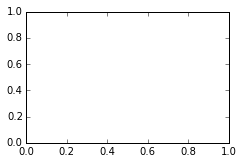

In [21]:
dir_path = []
dir_path = ['/Users/dwaithe/Documents/collaborators/GalianiS/pex/single_pex_CH/methanol/']
dir_path.append('/Users/dwaithe/Documents/collaborators/GalianiS/pex/double_pex_CH_new/methanol/')
mode = 'STED'
param0 = 'mean_int_norm'

condition = ['APD2_pex5','APD2_pex11','APD2_pex14','APD2_tom20']
#condition = ['pex5_pex14','pex11_pex14','pex5_pmp70','tom20_pex5']
color = ['red','blue','green','black','orange','magenta']
rand = [False,False,False,False]
chart = plot_histogram(condition,rand,color,param0,dir_path,bins=40,x0=0,x1=1.0)

chart[0].set_title('Pex5')
chart[0].set_ylabel('Relative frequency')
chart[0].set_xlabel('Normalised intensity (a.u.)')
chart[1].set_title('Pex11')
chart[1].set_ylabel('Relative frequency')
chart[1].set_xlabel('Normalised intensity (a.u.)')
chart[2].set_title('Pex14')
chart[2].set_ylabel('Relative frequency')
chart[2].set_xlabel('Normalised intensity (a.u.)')
chart[3].set_title('Tom20')
chart[3].set_ylabel('Relative frequency')
chart[3].set_xlabel('Normalised intensity (a.u.)')
chart[4].set_title('All conditions')
chart[4].set_ylabel('Relative frequency')
chart[4].set_xlabel('Normalised intensity (a.u.)')
fname = 'histogram_pex_norm_intensity_versuses_frequency'
path = '/Users/dwaithe/Documents/collaborators/GalianiS/pex/figures/'
savefig(path+fname+'.eps', dpi=300, facecolor='w', edgecolor='w', orientation='portrait', format='eps')

save_data_out(condition,param0,dir_path,path+'raw_data/'+fname)
plt.show()


/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:394: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 9394 but corresponding boolean dimension is 9331
/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:394: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 12346 but corresponding boolean dimension is 12280


condition:  APD2_pex5   (9251,)
condition:  APD2_pex11   (12211,)
condition: 

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:394: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 2705 but corresponding boolean dimension is 2697
/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:394: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 5678 but corresponding boolean dimension is 5647


 APD2_pex14   (2615,)
condition:  APD2_tom20   (5504,)
condition:  APD2_gfp   (13655,)


/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:394: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 13883 but corresponding boolean dimension is 13790


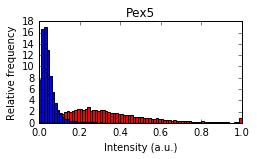

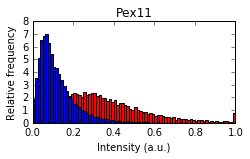

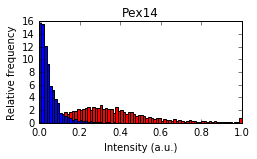

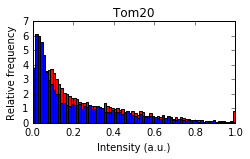

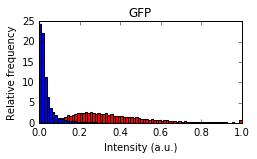

In [7]:
dir_path = []
dir_path = ['/Users/dwaithe/Documents/collaborators/GalianiS/pex/single_pex_CH/methanol/']
dir_path.append('/Users/dwaithe/Documents/collaborators/GalianiS/pex/double_pex_CH_new/methanol/')
mode = 'STED'
param0 = 'mean_int'

condition = ['APD2_pex5','APD2_pex5','APD2_pex11','APD2_pex11','APD2_pex14','APD2_pex14','APD2_tom20','APD2_tom20','APD2_gfp','APD2_gfp']
color = ['red','blue','green','black','orange','magenta']
fname = 'histogram_pex_norm_intensity_versuses_frequency'
path = '/Users/dwaithe/Documents/collaborators/GalianiS/pex/figures/raw_data/'

rand = [False, True,False, True,False, True]
chart = plot_histogram_with_control(condition[0:2],rand,color,param0,dir_path,path+fname+'_'+condition[0],bins=80,x0=0,x1=1.0)

figure()
chart[0].set_title('Pex5')
chart[0].set_ylabel('Relative frequency')
chart[0].set_xlabel('Intensity (a.u.)')



chart = plot_histogram_with_control(condition[2:4],rand,color,param0,dir_path,path+fname+'_'+condition[2],bins=80,x0=0,x1=1.0)
chart[0].set_title('Pex11')
chart[0].set_ylabel('Relative frequency')
chart[0].set_xlabel('Intensity (a.u.)')
figure()


chart = plot_histogram_with_control(condition[4:6],rand,color,param0,dir_path,path+fname+'_'+condition[4],bins=80,x0=0,x1=1.0)
chart[0].set_title('Pex14')
chart[0].set_ylabel('Relative frequency')
chart[0].set_xlabel('Intensity (a.u.)')

figure()
chart = plot_histogram_with_control(condition[6:8],rand,color,param0,dir_path,path+fname+'_'+condition[6],bins=80,x0=0,x1=1.0)
chart[0].set_title('Tom20')
chart[0].set_ylabel('Relative frequency')
chart[0].set_xlabel('Intensity (a.u.)')

figure()
chart = plot_histogram_with_control(condition[8:10],rand,color,param0,dir_path,path+fname+'_'+condition[8],bins=80,x0=0,x1=1.0)
chart[0].set_title('GFP')
chart[0].set_ylabel('Relative frequency')
chart[0].set_xlabel('Intensity (a.u.)')

#save_data_out([condition[0],condition[2],condition[4]],param0,dir_path,path+'raw_data/'+fname)
#fname = 'histogram_pex_norm_intensity_versuses_frequency_main_control'
#save_data_out([condition[1],condition[3],condition[5]],param0,dir_path,path+'raw_data/'+fname,rand=[True,True,True])


condition raw:  APD2_pex5  ai  (9058,)
condition  APD2_pex5  mu_arr 82
condition raw:  APD2_pex11  ai  (9784,)
condition  APD2_pex11  mu_arr 107
condition raw:  APD2_pex14  ai  (2570,)
condition  APD2_pex14  mu_arr 23
condition raw:  APD2_tom20  ai  (4699,)
condition  APD2_tom20  mu_arr 47
condition raw:  APD2_gfp  ai  (13759,)
condition  APD2_gfp  mu_arr 111


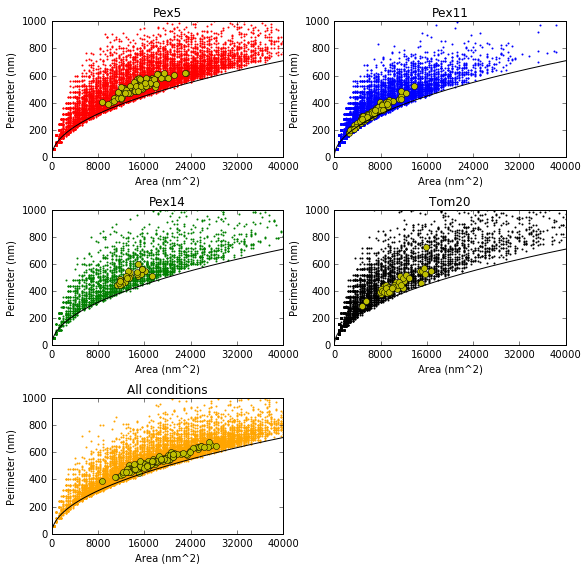

In [16]:
dir_path = []
dir_path.append('/Users/dwaithe/Documents/collaborators/GalianiS/pex/single_pex_CH/methanol/')
dir_path.append('/Users/dwaithe/Documents/collaborators/GalianiS/pex/double_pex_CH_new/methanol/')
mode = 'STED'
param0 = 'pixel_area'
param1 = 'perimeter'
condition = ['APD2_pex5','APD2_pex11','APD2_pex14','APD2_tom20','APD2_gfp']
figsize(8,8)
rand = [False, False,False,False,False]
#color = ['red','blue','green','black']
chart = plot_scatter(condition,rand,color,param0,param1,dir_path,0,100,0,50,line=True)
fname = 'scatter_plot_pex_perimeter_versuses_nm_area_random_nonrandom.eps'
#color = ['afmhot','afmhot','afmhot','afmhot','orange','magenta']
#chart = plot_density2d(condition,rand,color,param0,param1,dir_path,unit_x=2,unit_y=1,x0=0,x1=100,y0=0,y1=50,sigma=2,ceiling =200,line=True)
fname = 'density_plot_pex_perimeter_versuses_nm_area_with_line.eps'
save_data_out(condition,param0,dir_path,'out_scatter_a')
save_data_out(condition,param1,dir_path,'out_scatter_b')

sc1 = np.linspace(0,50,6).astype(np.int32)*(20)
sc2 = np.linspace(0,100,6).astype(np.int32)*(20**2)



chart[0].set_title('Pex5')
chart[0].set_ylabel('Perimeter (nm)')
chart[0].set_xlabel('Area (nm^2)')
chart[0].set_yticklabels(sc1)
chart[0].set_xticklabels(sc2)
 # range of values in edges

chart[1].set_title('Pex11')
chart[1].set_ylabel('Perimeter (nm)')
chart[1].set_xlabel('Area (nm^2)')
chart[1].set_yticklabels(sc1)
chart[1].set_xticklabels(sc2)
chart[2].set_title('Pex14')
chart[2].set_ylabel('Perimeter (nm)')
chart[2].set_xlabel('Area (nm^2)')
chart[2].set_yticklabels(sc1)
chart[2].set_xticklabels(sc2)
chart[3].set_title('Tom20')
chart[3].set_ylabel('Perimeter (nm)')
chart[3].set_xlabel('Area (nm^2)')
chart[3].set_yticklabels(sc1)
chart[3].set_xticklabels(sc2)
try:
    chart[4].set_title('All conditions')
    chart[4].set_ylabel('Perimeter (nm)')
    chart[4].set_xlabel('Area (nm^2)')
    chart[4].set_yticklabels(sc1)
    chart[4].set_xticklabels(sc2)
except:
    pass
path = '/Users/dwaithe/Documents/collaborators/GalianiS/pex/figures/'
savefig(path+fname, dpi=300, facecolor='w', edgecolor='w', orientation='portrait', format='eps')
save_data_out(condition,param0,dir_path,path+'raw_data/'+fname+'_a')
save_data_out(condition,param1,dir_path,path+'raw_data/'+fname+'_b')

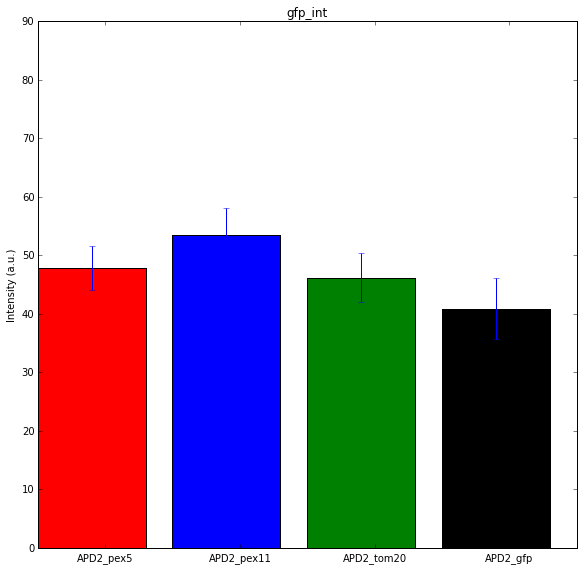

In [24]:
dir_path = []
dir_path.append('/Users/dwaithe/Documents/collaborators/GalianiS/pex/single_pex_CH/methanol/')
dir_path.append('/Users/dwaithe/Documents/collaborators/GalianiS/pex/double_pex_CH_new/methanol/')
param0 = 'gfp_int'
condition = ['APD2_pex5','APD2_pex11','APD2_pex14','APD2_tom20','APD2_gfp']

color = ['red','blue','green','black','orange','magenta']
rand = [False,False,False,False,False,False,False]
plot_bar(condition,rand,color,param0,dir_path)
ylim(0,90)
ylabel('Intensity (a.u.)')
out_path= '/Users/dwaithe/Documents/collaborators/GalianiS/'

path = '/Users/dwaithe/Documents/collaborators/GalianiS/pex/figures/'

fname = 'bar_chart_GFP_intensity.eps'
savefig(path+fname, dpi=300, facecolor='w', edgecolor='w', orientation='portrait', format='eps')
save_data_out(condition,param0,dir_path,path+'raw_data/'+fname+'_a',average=True)
save_data_out(condition,param1,dir_path,path+'raw_data/'+fname+'_b',average=True)

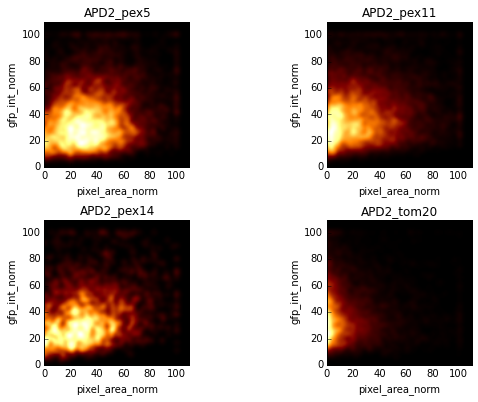

In [16]:
dir_path = []
dir_path.append('/Users/dwaithe/Documents/collaborators/GalianiS/pex/single_pex_CH/methanol/')
dir_path.append('/Users/dwaithe/Documents/collaborators/GalianiS/pex/double_pex_CH_new/methanol/')
param0 = 'pixel_area_norm'
param1 = 'gfp_int_norm'
condition = ['APD2_pex5','APD2_pex11','APD2_pex14','APD2_tom20']
#color = ['red','blue','green','black','orange','magenta']
rand = [False,False,False,False]
#plot_scatter(condition,rand,color,param0,param1,dir_path,0,400,0,200)
color = ['afmhot','afmhot','afmhot','afmhot','orange','magenta']
plot_density2d(condition,rand,color,param0,param1,dir_path,y0=0,y1=110,x0=0,x1=110,sigma=2,ceiling =100)


save_data_out(condition,param0,dir_path,'out_scatter_a')
save_data_out(condition,param1,dir_path,'out_scatter_b')

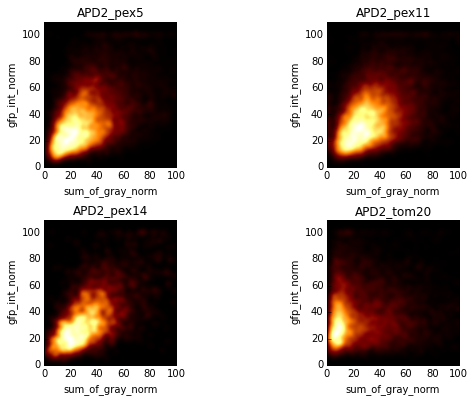

In [17]:
dir_path = []
dir_path.append('/Users/dwaithe/Documents/collaborators/GalianiS/pex/single_pex_CH/methanol/')
dir_path.append('/Users/dwaithe/Documents/collaborators/GalianiS/pex/double_pex_CH_new/methanol/')
param0 = 'sum_of_gray_norm'
param1 = 'gfp_int_norm'
condition = ['APD2_pex5','APD2_pex11','APD2_pex14','APD2_tom20']
#color = ['red','blue','green','black','orange','magenta']
rand = [False,False,False,False]
#plot_scatter(condition,rand,color,param0,param1,dir_path,0,400,0,200)
color = ['afmhot','afmhot','afmhot','afmhot','afmhot','afmhot']
plot_density2d(condition,rand,color,param0,param1,dir_path,y0=0,y1=110,x0=0,x1=100,sigma=2,ceiling =800)


save_data_out(condition,param0,dir_path,'out_scatter_a')
save_data_out(condition,param1,dir_path,'out_scatter_b')

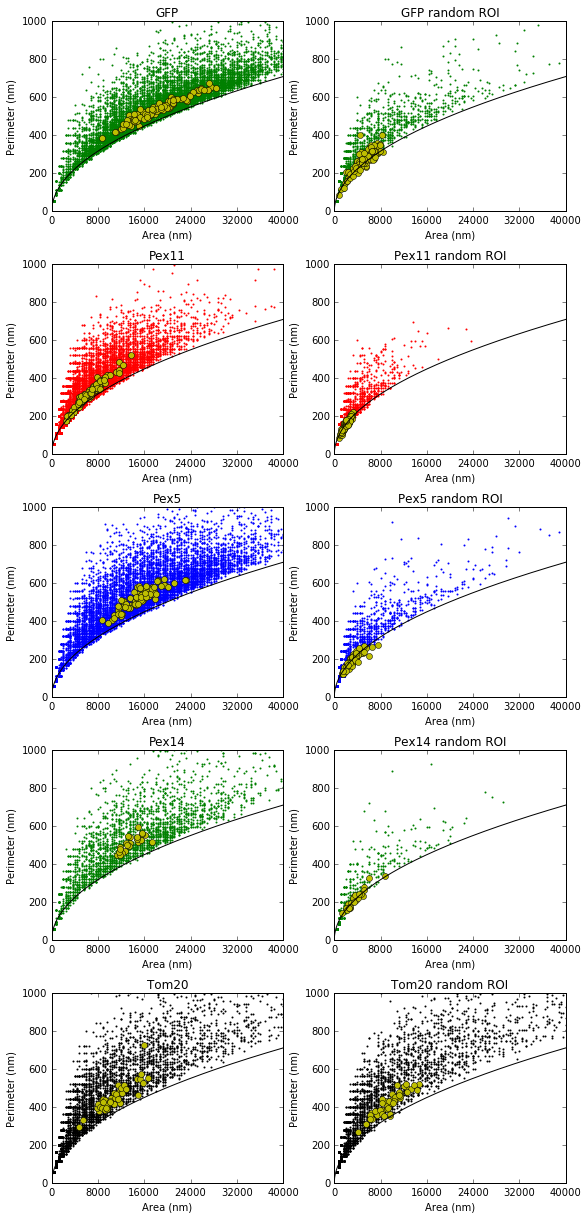

In [33]:
dir_path = []
dir_path.append('/Users/dwaithe/Documents/collaborators/GalianiS/pex/single_pex_CH/methanol/')
dir_path.append('/Users/dwaithe/Documents/collaborators/GalianiS/pex/double_pex_CH_new/methanol/')
mode = 'STED'
param0 = 'pixel_area'
param1 = 'perimeter'

figsize(8,12)
rand = [False,True,False,True,False,True,False,True,False,True]
#plot_scatter(condition,rand,color,param0,param1,dir_path,x0=0,x1=200,y0=0,y1=100,line=True)
condition = ['APD2_gfp','APD2_gfp','APD2_pex11','APD2_pex11','APD2_pex5','APD2_pex5','APD2_pex14','APD2_pex14','APD2_tom20','APD2_tom20']
color = ['green','green','red','red','blue','blue','green','green','black','black']
chart = plot_scatter(condition,rand,color,param0,param1,dir_path,0,100,0,50,line=True)

#color = ['afmhot','afmhot','afmhot','afmhot','afmhot','afmhot','afmhot','afmhot']
#chart = plot_density2d(condition,rand,color,param0,param1,dir_path,x0=0,x1=100,y0=0,y1=50,sigma=2,ceiling =200)
#fname = 'density_plot_pex_perimeter_versuses_pixel_area_random_non_random.eps'

sc1 = np.linspace(0,50,6).astype(np.int32)*(20)
sc2 = np.linspace(0,100,6).astype(np.int32)*(20**2)


save_data_out(condition,param0,dir_path,'out_scatter_a')
save_data_out(condition,param1,dir_path,'out_scatter_b')

for i in range(0,10):
    chart[i].set_ylabel('Perimeter (nm)')
    chart[i].set_xlabel('Area (nm)')
    chart[i].set_yticklabels(sc1)
    chart[i].set_xticklabels(sc2)

chart[0].set_title('GFP')
chart[1].set_title('GFP random ROI')
chart[2].set_title('Pex11')
chart[3].set_title('Pex11 random ROI')
chart[4].set_title('Pex5')
chart[5].set_title('Pex5 random ROI')
chart[6].set_title('Pex14')
chart[7].set_title('Pex14 random ROI')
chart[8].set_title('Tom20')
chart[9].set_title('Tom20 random ROI')


fname = 'scatter_plot_pex_perimeter_versuses_pixel_area_random_non_random.eps'
path = '/Users/dwaithe/Documents/collaborators/GalianiS/pex/figures/'
savefig(path+fname, dpi=300, facecolor='w', edgecolor='w', orientation='portrait', format='eps')
save_data_out(condition,param0,dir_path,path+'raw_data/'+fname+'_a',rand=rand,nonZero = True)
save_data_out(condition,param1,dir_path,path+'raw_data/'+fname+'_b',rand=rand,nonZero = True)
save_data_out(condition,param0,dir_path,path+'raw_data/'+fname+'_meancell_a',rand=rand,average=True,nonZero = True)
save_data_out(condition,param1,dir_path,path+'raw_data/'+fname+'_meancell_b',rand=rand, average=True,nonZero = True)

In [191]:
### r = np.arange(1,10,2)
x = 2*r*(r+1)+1
y = (r*2) +((r-2)*2)
print r
print x
print y

1
5
0


### Two STED channel image analysis

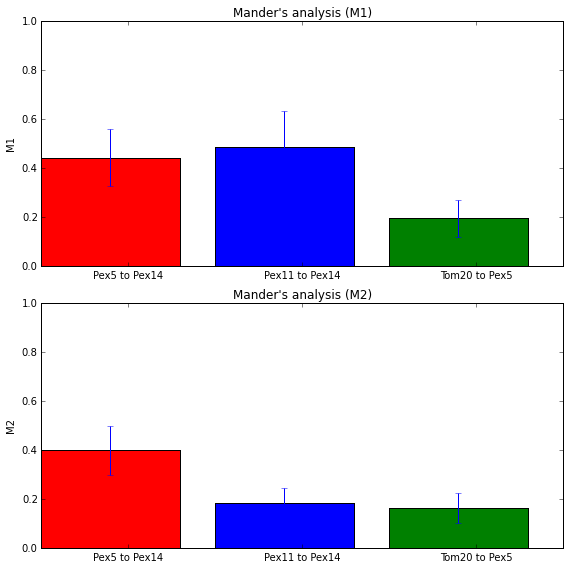

In [63]:
dir_path = ['/Users/dwaithe/Documents/collaborators/GalianiS/pex/double_pex_CH_new/methanol/']
param0 = 'M1_arr'
condition = ['APD2_pex5_APD3_pex14','APD2_pex11_APD3_pex14','APD2_tom20_APD3_pex5']

subplot(2,1,1)
color = ['red','blue','green','black','orange','magenta']
rand = [False,False,False,False,False,False,False]
plot_bar(condition,rand,color,param0,dir_path)


ylim(0,1.0)
title("Mander's analysis (M1)")
ylabel("M1")
param1 = 'M2_arr'

xticks(np.arange(0,condition.__len__())+0.5,["Pex5 to Pex14","Pex11 to Pex14","Tom20 to Pex5"])
subplot(2,1,2)
color = ['red','blue','green','black','orange','magenta']
rand = [False,False,False,False,False,False,False]
plot_bar(condition,rand,color,param1,dir_path)
title("Mander's analysis (M2)")
ylim(0,1.0)
ylabel("M2")
xticks(np.arange(0,condition.__len__())+0.5,["Pex5 to Pex14","Pex11 to Pex14","Tom20 to Pex5"])

fname = 'bar_chart_pex_manders'
path = '/Users/dwaithe/Documents/collaborators/GalianiS/pex/figures/'
savefig(path+fname+'.eps', dpi=300, facecolor='w', edgecolor='w', orientation='portrait', format='eps')
save_data_out(condition,param0,dir_path,path+'raw_data/'+fname+'_M1')
save_data_out(condition,param1,dir_path,path+'raw_data/'+fname+'_M2')

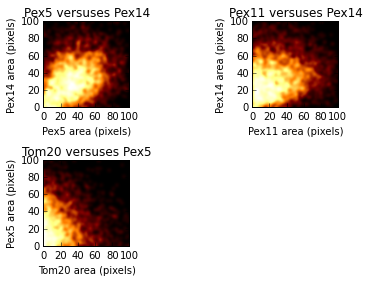

In [18]:
dir_path = []
dir_path.append('/Users/dwaithe/Documents/collaborators/GalianiS/pex/double_pex_CH_new/methanol/')
mode = 'STED'
param0 = 'pixel_area_norm'
param1 = 'pixel_area_norm_2'


rand = [False,False,False,False,False]
#plot_scatter(condition,rand,color,param0,param1,dir_path,x0=0,x1=200,y0=0,y1=100,line=True)
color = ['afmhot','afmhot','afmhot','afmhot','orange','magenta']
condition = ['APD2_pex5_APD3_pex14','APD2_pex11_APD3_pex14','APD2_tom20_APD3_pex5']
chart = plot_density2d(condition,rand,color,param0,param1,dir_path,y0=0,y1=100,x0=0,x1=100,sigma=2,ceiling =1)

save_data_out(condition,param0,dir_path,'out_scatter_a')
save_data_out(condition,param1,dir_path,'out_scatter_b')
rand = [False,False,False,False]

chart[0].set_title('Pex5 versuses Pex14')
chart[0].set_ylabel('Pex14 area (pixels)')
chart[0].set_xlabel('Pex5 area (pixels)')
chart[1].set_title('Pex11 versuses Pex14')
chart[1].set_ylabel('Pex14 area (pixels)')
chart[1].set_xlabel('Pex11 area (pixels)')
chart[2].set_title('Tom20 versuses Pex5')
chart[2].set_ylabel('Pex5 area (pixels)')
chart[2].set_xlabel('Tom20 area (pixels)')

fname = 'density_plot_pex_pixel_area.eps'
path = '/Users/dwaithe/Documents/collaborators/GalianiS/pex/figures/'
savefig(path+fname, dpi=300, facecolor='w', edgecolor='w', orientation='portrait', format='eps')
save_data_out(condition,param0,dir_path,path+'raw_data/'+fname+'_a',rand=rand)
save_data_out(condition,param1,dir_path,path+'raw_data/'+fname+'_b',rand=rand)

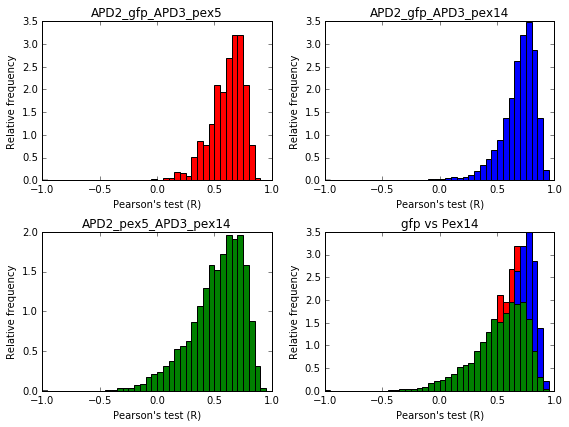

In [24]:
dir_path = ['/Users/dwaithe/Documents/collaborators/GalianiS/pex/double_pex_CH_new/methanol/']
param0 = 'pear'


condition = ['APD2_pex5_APD3_pex14','APD2_pex11_APD3_pex14','APD2_tom20_APD3_pex5','APD2_gfp_APD3_pex14','APD2_gfp_APD3_pex5']
condition = ['APD2_gfp_APD3_pex5','APD2_gfp_APD3_pex14','APD2_pex5_APD3_pex14']

color = ['red','blue','green','black','orange','magenta']
rand = [False,False,False,False,False]
chart = plot_histogram(condition,rand,color,param0,dir_path,bins=40,x0=-1,x1=1)

#chart[0].set_title('Pex5 versuses Pex14')
chart[0].set_ylabel('Relative frequency')
chart[0].set_xlabel('Pearson\'s test (R)')
#chart[1].set_title('Pex11 versuses Pex14')
chart[1].set_ylabel('Relative frequency')
chart[1].set_xlabel('Pearson\'s test (R)')
#chart[2].set_title('Tom20 versuses Pex5')
chart[2].set_ylabel('Relative frequency')
chart[2].set_xlabel('Pearson\'s test (R)')
chart[3].set_title('gfp vs Pex14')
chart[3].set_ylabel('Relative frequency')
chart[3].set_xlabel('Pearson\'s test (R)')
#chart[4].set_title('Grouped')
#chart[4].set_ylabel('Relative frequency')
#chart[4].set_xlabel('Pearson\'s test (R)')

fname = 'histogram_plot_pearsons.eps'
path = '/Users/dwaithe/Documents/collaborators/GalianiS/pex/figures/'
savefig(path+fname, dpi=300, facecolor='w', edgecolor='w', orientation='portrait', format='eps')
save_data_out(condition,param0,dir_path,path+'raw_data/'+fname+'_a',rand=rand)




/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/numpy/lib/function_base.py:229: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/numpy/lib/function_base.py:230: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


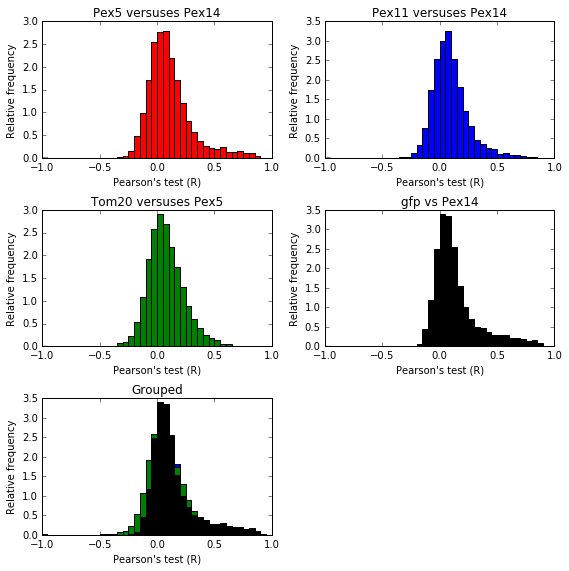

In [17]:
dir_path = ['/Users/dwaithe/Documents/collaborators/GalianiS/pex/double_pex_CH_new/methanol/']
param0 = 'pear'


condition = ['APD2_pex5_APD3_pex14','APD2_pex11_APD3_pex14','APD2_tom20_APD3_pex5','APD2_gfp_APD3_pex14']
color = ['red','blue','green','black','orange','magenta']
rand = [True,True,True,True]
chart = plot_histogram(condition,rand,color,param0,dir_path,bins=40,x0=-1,x1=1)

chart[0].set_title('Pex5 versuses Pex14')
chart[0].set_ylabel('Relative frequency')
chart[0].set_xlabel('Pearson\'s test (R)')
chart[1].set_title('Pex11 versuses Pex14')
chart[1].set_ylabel('Relative frequency')
chart[1].set_xlabel('Pearson\'s test (R)')
chart[2].set_title('Tom20 versuses Pex5')
chart[2].set_ylabel('Relative frequency')
chart[2].set_xlabel('Pearson\'s test (R)')
chart[3].set_title('gfp vs Pex14')
chart[3].set_ylabel('Relative frequency')
chart[3].set_xlabel('Pearson\'s test (R)')
chart[4].set_title('Grouped')
chart[4].set_ylabel('Relative frequency')
chart[4].set_xlabel('Pearson\'s test (R)')

fname = 'histogram_plot_pearsons_random.eps'
path = '/Users/dwaithe/Documents/collaborators/GalianiS/pex/figures/'
savefig(path+fname, dpi=300, facecolor='w', edgecolor='w', orientation='portrait', format='eps')
save_data_out(condition,param0,dir_path,path+'raw_data/'+fname+'_a',rand=rand)


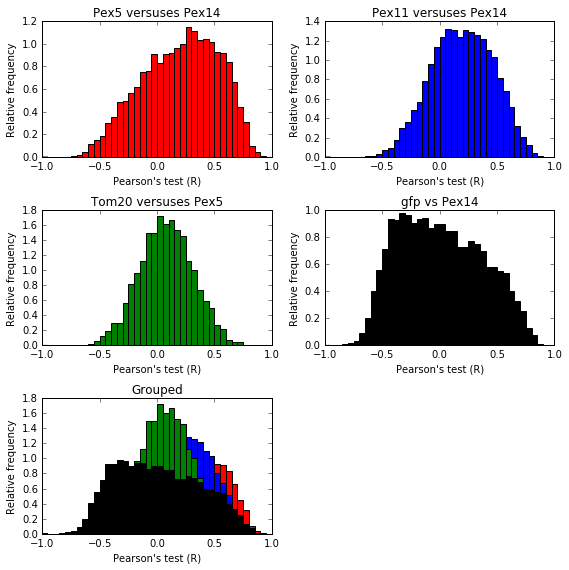

In [18]:
dir_path = ['/Users/dwaithe/Documents/collaborators/GalianiS/pex/double_pex_CH_new/methanol/']
param0 = 'pear_flip'
mode = 'STED'

condition = ['APD2_pex5_APD3_pex14','APD2_pex11_APD3_pex14','APD2_tom20_APD3_pex5','APD2_gfp_APD3_pex14']
color = ['red','blue','green','black','orange','magenta']
rand = [False,False,False,False,False]
chart = plot_histogram(condition,rand,color,param0,dir_path,bins=40,x0=-1,x1=1)

chart[0].set_title('Pex5 versuses Pex14')
chart[0].set_ylabel('Relative frequency')
chart[0].set_xlabel('Pearson\'s test (R)')
chart[1].set_title('Pex11 versuses Pex14')
chart[1].set_ylabel('Relative frequency')
chart[1].set_xlabel('Pearson\'s test (R)')
chart[2].set_title('Tom20 versuses Pex5')
chart[2].set_ylabel('Relative frequency')
chart[2].set_xlabel('Pearson\'s test (R)')
chart[3].set_title('gfp vs Pex14')
chart[3].set_ylabel('Relative frequency')
chart[3].set_xlabel('Pearson\'s test (R)')
chart[4].set_title('Grouped')
chart[4].set_ylabel('Relative frequency')
chart[4].set_xlabel('Pearson\'s test (R)')

fname = 'histogram_plot_pearsons_flip.eps'
path = '/Users/dwaithe/Documents/collaborators/GalianiS/pex/figures/'
savefig(path+fname, dpi=300, facecolor='w', edgecolor='w', orientation='portrait', format='eps')
save_data_out(condition,param0,dir_path,path+'raw_data/'+fname+'_a',rand=rand)



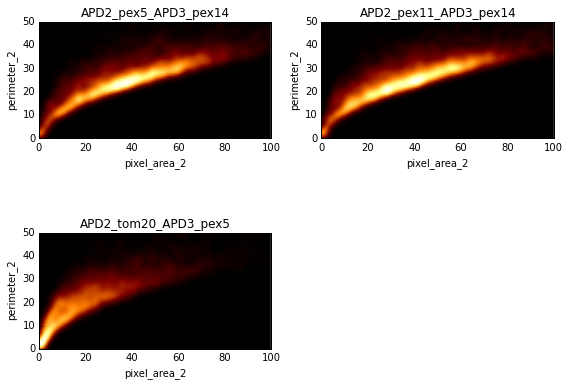

In [248]:
dir_path = []
#dir_path = ['/Users/dwaithe/Documents/collaborators/GalianiS/pex/single_pex_CH/methanol/']
dir_path.append('/Users/dwaithe/Documents/collaborators/GalianiS/pex/double_pex_CH_new/methanol/')
mode = 'STED'
param0 = 'pixel_area_2'
param1 = 'perimeter_2'
condition = ['APD2_pex5_APD3_pex14','APD2_pex11_APD3_pex14','APD2_tom20_APD3_pex5']

rand = [False,False,False,False]
color = ['','','','']
#plot_scatter(condition,rand,color,param0,param1,dir_path,0,400,0,100,line=True)
color = ['afmhot','afmhot','afmhot','afmhot','orange','magenta']
plot_density2d(condition,rand,color,param0,param1,dir_path,y0=0,y1=50,x0=0,x1=100,sigma=1.5,ceiling =200,line=True)
save_data_out(condition,param0,dir_path,'out_scatter_a')
save_data_out(condition,param1,dir_path,'out_scatter_b')

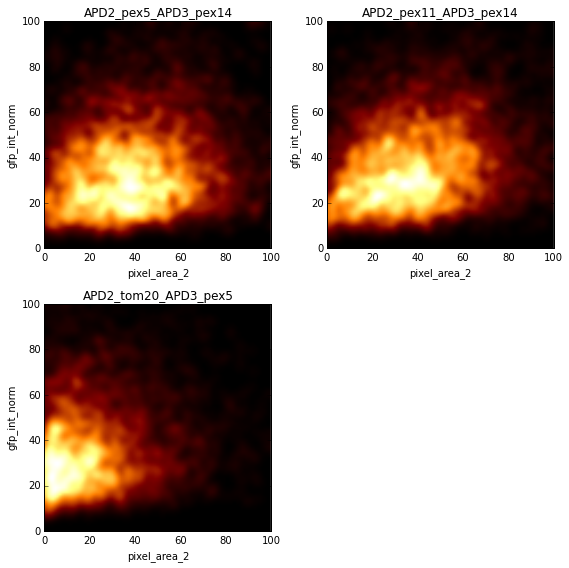

In [500]:
dir_path = []
figsize(8,8)
#dir_path = ['/Users/dwaithe/Documents/collaborators/GalianiS/pex/single_pex_CH/methanol/']
dir_path.append('/Users/dwaithe/Documents/collaborators/GalianiS/pex/double_pex_CH_new/methanol/')
mode = 'STED'
param0 = 'pixel_area_2'
param1 = 'gfp_int_norm'
condition = ['APD2_pex5_APD3_pex14','APD2_pex11_APD3_pex14','APD2_tom20_APD3_pex5']

rand = [False,False,False,False]
color = ['','','','']
#plot_scatter(condition,rand,color,param0,param1,dir_path,0,400,0,100,line=True)
color = ['afmhot','afmhot','afmhot','afmhot','orange','magenta']
plot_density2d(condition,rand,color,param0,param1,dir_path,y0=0,y1=100,x0=0,x1=100,sigma=2,ceiling =200)
save_data_out(condition,param0,dir_path,'out_scatter_a')
save_data_out(condition,param1,dir_path,'out_scatter_b')

0.716301686378  std: 0.135335214502  sd: 0.0208826769655
0.45639308795  std: 0.14044030414  sd: 0.0155090371086
0.447483749623  std: 0.152045359204  sd: 0.0146987796733
0.625848684411  std: 0.137313389887  sd: 0.0286318210344
0.0548387533768  std: 0.113675400845  sd: 0.0165812613777


[[0.63431836478613535,
  0.90921270329006454,
  0.85634915448984095,
  0.77622037700572033,
  0.82310143659599333,
  0.87112531433441154,
  0.84065371155773183,
  0.90088710439006603,
  0.92448474289577343,
  0.87485948989834605,
  0.75094668877100357,
  0.8109551788207191,
  0.84409805789343417,
  0.80986730681449015,
  0.74812511584283981,
  0.89161893901733702,
  0.93566327020645745,
  0.71043385641634971,
  0.70210166565325338,
  0.75443191726366454,
  0.63151330062193778,
  0.60964425904495123,
  0.48469375683612526,
  0.76135430206909438,
  0.65837865524953187,
  0.6964790788205405,
  0.71595443136420611,
  0.52702624821680399,
  0.82906911023284302,
  0.68649040943006168,
  0.64233448195081877,
  0.5117028929698636,
  0.75456052478818614,
  0.4794128649945717,
  0.52314682017478231,
  0.67296307878866068,
  0.54725077914884845,
  0.48383601948954469,
  0.49590445845396874,
  0.56101070356157978,
  0.67100650365656644,
  0.77148375206577013],
 [0.38343309538413239,
  0.4987310928

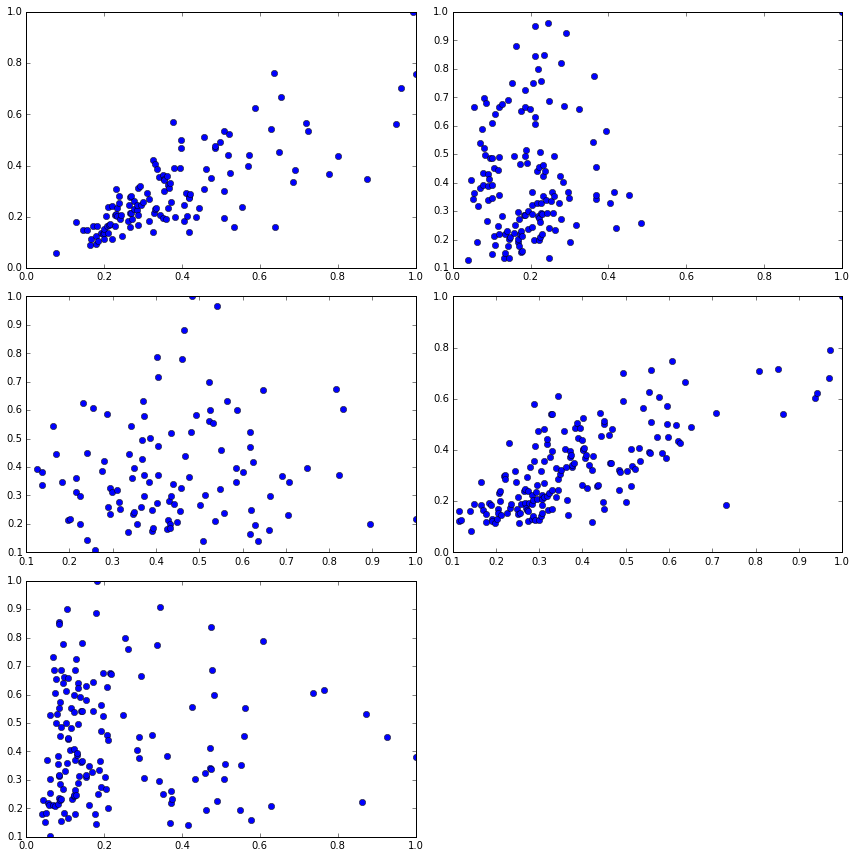

In [288]:
dir_path = []
figsize(12,12)
dir_path = ['/Users/dwaithe/Documents/collaborators/GalianiS/pex/single_pex_CH/methanol/']
dir_path.append('/Users/dwaithe/Documents/collaborators/GalianiS/pex/double_pex_CH_new/methanol/')
mode = 'STED'
param0 = 'sum_of_gray_norm'
param1 = 'gfp_int_norm'
condition = ['APD2_gfp','APD2_pex5','APD2_pex11','APD2_pex14','APD2_tom20']
#condition = ['APD2_pex5_APD3_pex14','APD2_pex11_APD3_pex14','APD2_tom20_APD3_pex5']
rand = [False,False,False,False,False]
color = ['','','','','','']
#plot_scatter(condition,rand,color,param0,param1,dir_path,0,400,0,100,line=True)
color = ['afmhot','afmhot','afmhot','afmhot','orange','magenta']
#chart = plot_density2d(condition,rand,color,param0,param1,dir_path,y0=0,y1=100,x0=0,x1=100,sigma=2,ceiling =200)


#chart[0].set_title('APD2 Pex5 versus GFP intensity')
#chart[0].set_ylabel('GFP intensity (norm)')
#chart[0].set_xlabel('APD2 Pex5 staining intensity (norm)')
#chart[1].set_title('APD2 Pex11 versus GFP intensity')
#chart[1].set_ylabel('GFP intensity (norm)')
#chart[1].set_xlabel('APD2 Pex11 staining intensity (norm)')
#chart[2].set_title('APD2 Pex14 versus GFP intensity')
#chart[2].set_ylabel('GFP intensity (norm)')
#chart[2].set_xlabel('APD2 Pex14 staining intensity (norm)')
#chart[3].set_title('APD2 Tom20 versus GFP intensity')
#chart[3].set_ylabel('GFP intensity (norm)')
#chart[3].set_xlabel('APD2 Tom20 staining intensity (norm)')

fname = 'density_plot_APD2_pex_versus_GFP_intensity.eps'
path = '/Users/dwaithe/Documents/collaborators/GalianiS/pex/figures/'
savefig(path+fname, dpi=300, facecolor='w', edgecolor='w', orientation='portrait', format='eps')
mu, std, mu_array = calc_correlation(condition,rand,color,param0,param1,dir_path,path+'raw_data/'+fname+'_corr')
save_data_out(condition,param0,dir_path,path+'raw_data/'+fname+'_a',rand=rand)
save_data_out(condition,param1,dir_path,path+'raw_data/'+fname+'_b',rand=rand)
mu_array

In [ ]:
#of the GFP foci there tend to be more which are not flu

0.568950267454  std: 0.139582129612  sd: 0.0197398940763
0.572603797721  std: 0.147052997948  sd: 0.0198286221982
0.490660294227  std: 0.142845522388  sd: 0.0234836592217


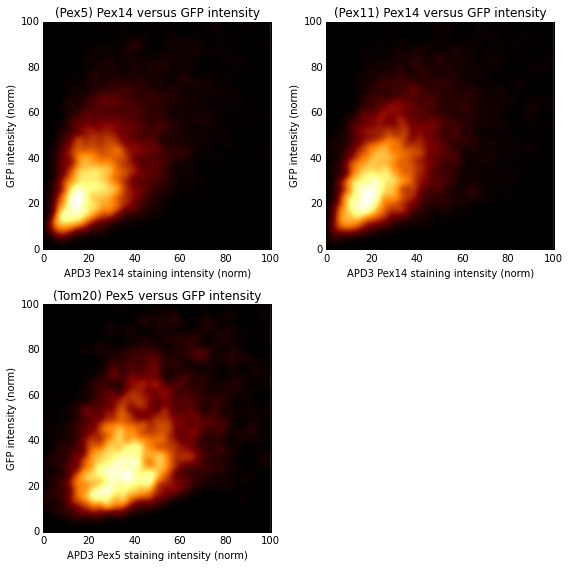

In [23]:
dir_path = []
figsize(8,8)
#dir_path = ['/Users/dwaithe/Documents/collaborators/GalianiS/pex/single_pex_CH/methanol/']
dir_path.append('/Users/dwaithe/Documents/collaborators/GalianiS/pex/double_pex_CH_new/methanol/')
mode = 'STED'
param0 = 'sum_of_gray_norm_2'
param1 = 'gfp_int_norm'
condition = ['APD2_pex5_APD3_pex14','APD2_pex11_APD3_pex14','APD2_tom20_APD3_pex5']

rand = [False,False,False,False]
color = ['','','','']
#plot_scatter(condition,rand,color,param0,param1,dir_path,0,400,0,100,line=True)
color = ['afmhot','afmhot','afmhot','afmhot','orange','magenta']
chart = plot_density2d(condition,rand,color,param0,param1,dir_path,y0=0,y1=100,x0=0,x1=100,sigma=2,ceiling =200)

chart[0].set_title('(Pex5) Pex14 versus GFP intensity')
chart[0].set_ylabel('GFP intensity (norm)')
chart[0].set_xlabel('APD3 Pex14 staining intensity (norm)')
chart[1].set_title('(Pex11) Pex14 versus GFP intensity')
chart[1].set_ylabel('GFP intensity (norm)')
chart[1].set_xlabel('APD3 Pex14 staining intensity (norm)')
chart[2].set_title('(Tom20) Pex5 versus GFP intensity')
chart[2].set_ylabel('GFP intensity (norm)')
chart[2].set_xlabel('APD3 Pex5 staining intensity (norm)')


fname = 'density_plot_APD3_pex_versus_GFP_intenisy.eps'
path = '/Users/dwaithe/Documents/collaborators/GalianiS/pex/figures/'
calc_correlation(condition,rand,color,param0,param1,dir_path,path+'raw_data/'+fname+'_corr')
savefig(path+fname, dpi=300, facecolor='w', edgecolor='w', orientation='portrait', format='eps')
save_data_out(condition,param0,dir_path,path+'raw_data/'+fname+'_a',rand=rand)
save_data_out(condition,param1,dir_path,path+'raw_data/'+fname+'_b',rand=rand)

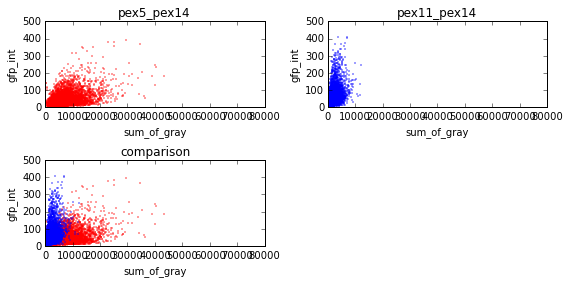

In [125]:
dir_path = '/Users/dwaithe/Documents/collaborators/GalianiS/pex/double_pex_CH_new/methanol/'
mode = 'STED'

yaxis = 'gfp_int'
xaxis = 'sum_of_gray'
condition = ['pex5_pex14','pex11_pex14']
color = ['red','blue','green','black','orange','magenta']
rand = [False,False,False,False]
plot_scatter(condition,rand,color,xaxis,yaxis,dir_path,x0=0,x1=80000,y0=0,y1=500)

save_data_out(condition,param0,dir_path,'out_scatter_a')
save_data_out(condition,param1,dir_path,'out_scatter_b')

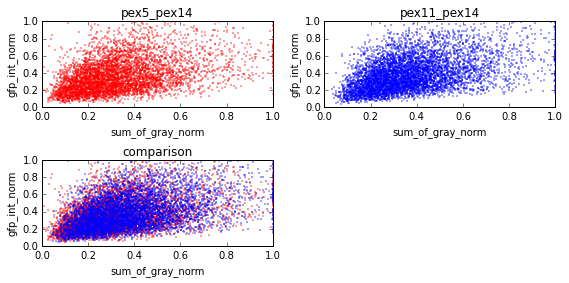

In [102]:
dir_path = '/Users/dwaithe/Documents/collaborators/GalianiS/pex/double_pex_CH_new/methanol/'
mode = 'STED'

yaxis = 'gfp_int_norm'
xaxis = 'sum_of_gray_norm'
condition = ['pex5_pex14','pex11_pex14']
color = ['red','blue','green','black','orange','magenta']
rand = [False,False,False,False]
plot_scatter(condition,rand,color,xaxis,yaxis,dir_path,x0=0,x1=1,y0=0,y1=1)

save_data_out(condition,param0,dir_path,'out_scatter_a')
save_data_out(condition,param1,dir_path,'out_scatter_b')

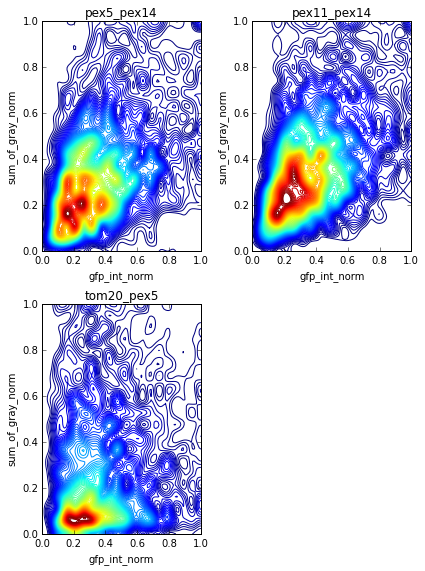

In [101]:
dir_path = '/Users/dwaithe/Documents/collaborators/GalianiS/pex/double_pex_CH_new/methanol/'
mode = 'STED'
param0 = 'gfp_int_norm'
param1 = 'sum_of_gray_norm'
condition = ['pex5_pex14','pex11_pex14','tom20_pex5']
color = ['red','blue','green','black','orange','magenta']
rand =[False,False,False,False]
plot_histogram2d(condition,rand,color,param0,param1,dir_path,bins_x=20,bins_y=20,x0=0,x1=1,y0=0,y1=1)

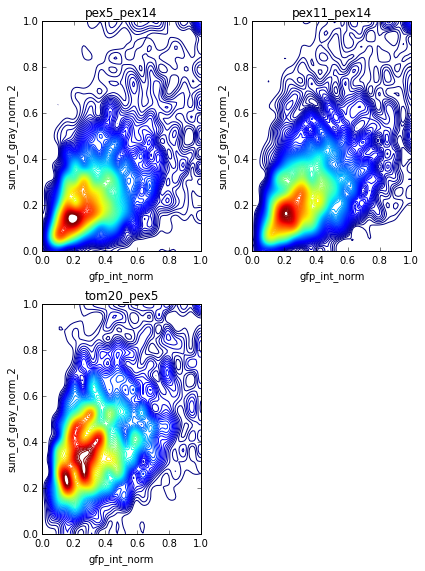

In [104]:
dir_path = '/Users/dwaithe/Documents/collaborators/GalianiS/pex/double_pex_CH_new/methanol/'
mode = 'STED'
param0 = 'gfp_int_norm'
param1 = 'sum_of_gray_norm_2'
condition = ['pex5_pex14','pex11_pex14','tom20_pex5']
color = ['red','blue','green','black','orange','magenta']
rand =[False,False,False,False]
plot_histogram2d(condition,rand,color,param0,param1,dir_path,bins_x=20,bins_y=20,x0=0,x1=1,y0=0,y1=1)

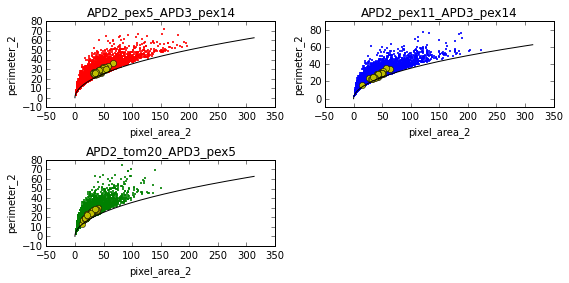

In [207]:
dir_path = ['/Users/dwaithe/Documents/collaborators/GalianiS/pex/single_pex_CH/methanol/']
dir_path.append('/Users/dwaithe/Documents/collaborators/GalianiS/pex/double_pex_CH_new/methanol/')



condition = ['APD2_pex5_APD3_pex14','APD2_pex11_APD3_pex14','APD2_tom20_APD3_pex5']
mode = 'STED'
param0 = 'pixel_area_2'
param1 = 'perimeter_2'
#condition = ['STED1_APD2_pex5','STED1_APD2_pex11', 'STED1_APD2_pex14','tom20']
#condition = ['pex11_pex14','pex11_pex14']
color = ['red','blue','green','black','orange','magenta']
rand = [False,False,False,False,False]
#plot_scatter(condition,rand,color,param0,param1,dir_path,x0=0,x1=16000,y0=0,y1=200)
plot_scatter(condition,rand,color,param0,param1,dir_path,line=True)
save_data_out(condition,param0,dir_path,'out_scatter_a')
save_data_out(condition,param1,dir_path,'out_scatter_b')

OSError: [Errno 2] No such file or directory: 'U'

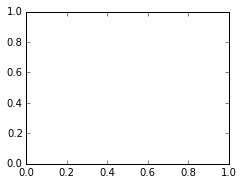

In [195]:
dir_path = '/Users/dwaithe/Documents/collaborators/GalianiS/pex/single_pex_CH/methanol/'
param0 = 'pixel_area'
#condition = ['pex5','pex11','pex14','tom20']
subplot(2,2,1)
condition = ['pex11_pex14','pex11_pex14','pex5_pmp70','tom20_pex5']
color = ['red','blue','green','black','orange','magenta']
rand = [False,False,False,False]
plot_bar(condition,rand,color,param0,dir_path)
save_data_out(condition,param0,dir_path,'out_bar_a')


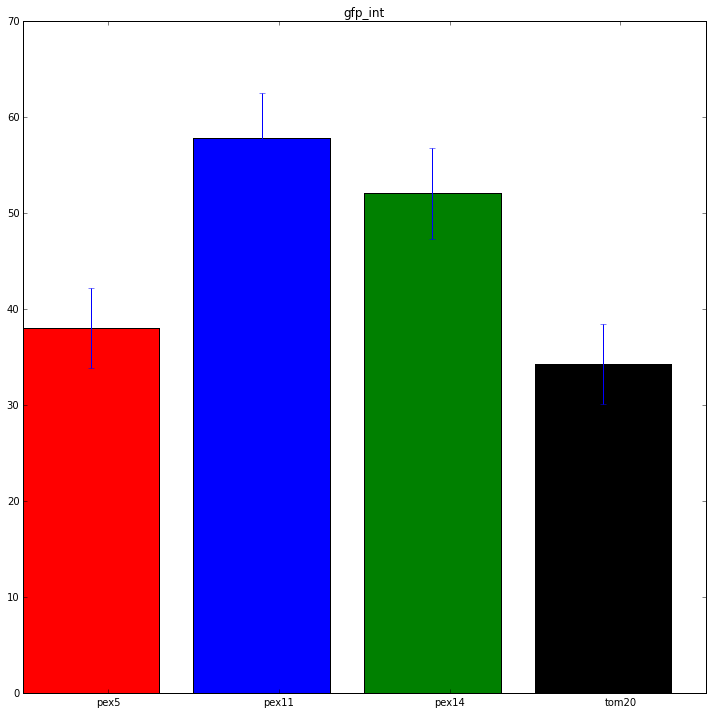

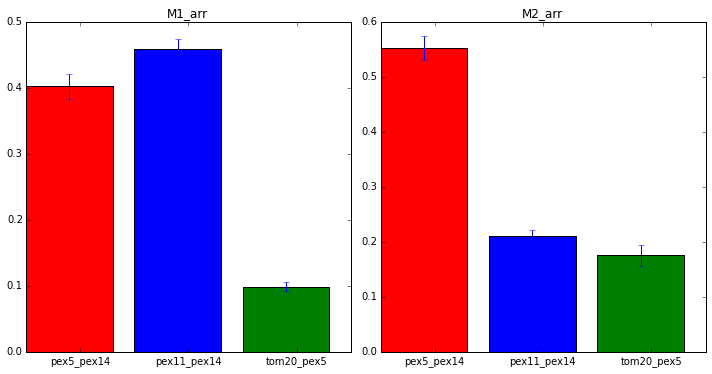

In [325]:
dir_path = '/Users/dwaithe/Documents/collaborators/GalianiS/pex/double_pex_CH_new/methanol/'
param0 = 'M1_arr'
#condition = ['pex5','pex11','pmp70','tom20']
subplot(2,2,1)
condition = ['pex5_pex14','pex11_pex14','tom20_pex5']
color = ['red','blue','green','black','orange','magenta']
rand = [False,False,False,False,False]
plot_bar(condition,rand,color,param0,dir_path)
save_data_out(condition,param0,dir_path,'out_bar_a')
param0 = 'M2_arr'
subplot(2,2,2)
plot_bar(condition,rand,color,param0,dir_path)
save_data_out(condition,param0,dir_path,'out_bar_a')

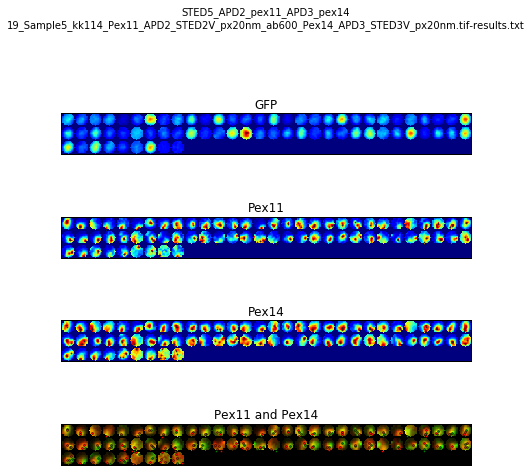

In [31]:
import random
from scipy.ndimage.morphology import distance_transform_edt
from scipy.ndimage.filters import maximum_filter as mxf
from scipy.ndimage.measurements import label, find_objects
dir_list = []
#dir_list.append('STED1_APD2_pex11_APD3_pex14')
#dir_list.append('STED2_APD2_pex11_APD3_pex14')
dir_list.append('STED5_APD2_pex11_APD3_pex14')
#dir_list.append('STED2_APD2_pex5_APD3_pex14')
#dir_list.append('STED3_APD2_pex5_APD3_pex14')
#dir_list.append('STED5_APD2_pex5_APD3_pex14')
#dir_list.append('STED1_APD2_gfp_APD3_pex14')
#dir_list.append('STED2_APD2_gfp_APD3_pex14')
dir_path = '/Users/dwaithe/Documents/collaborators/GalianiS/pex/double_pex_CH_new/methanol/'
out_path = '/Users/dwaithe/Documents/collaborators/GalianiS/pex/analysis/web_out/'
sort_by = 'pear' #gfp_int, gfp_int_norm, mean_int_norm, sum_of_gray_norm, pixel_area_norm,circ_norm, 
#perimeter_norm, mean_int, sum_of_gray, pixel_area, circ, perimeter
#mean_int_norm_2, sum_of_gray_norm_2, pixel_area_norm_2, circ_norm_2, perimeter_norm_2, mean_int_2
#sum_of_gray_2, pixel_area_2, circ_2, perimeter_2, M1_arr, M2_arr, pear, pear_flip

#IMG number:
num_of_img_row = 30
dir_ind = 0
pSize = 19
pNorm = True
pSmooth = 1.0
plot_img = True
just_max_maxima = False

html =''
html +="<html>"
#html +="<h3 align=\"center\"> Ordered by: "+def_dict[sort_by]+"</h3>"

#Used for output.
data_out1 =[]
data_out2 =[]
data_out3 =[]
data_out4 =[]
bin_im = gen_cir_mask(pSize)
#Iterate through each folder in the list above.
num_peak_arr_CH0 = []
num_peak_arr_CH1 = []
grn_ratio_0 = []
grn_ratio_1 = []
red_ratio_0 = []
red_ratio_1 = []
for dir_ind in range(0,dir_list.__len__()):
    #Read in the ImageJ data.
    file_list,file_list_rand =obtain_files_for_condition('APD2', 'STED', [dir_list[dir_ind]],dir_path)
    #Read in the ImageJ images.
    img_list,img_list_rand =obtain_imgs_for_condition('APD2', 'STED', [dir_list[dir_ind]],dir_path)
    for ind in range(0,file_list.__len__()):
        
        file_title = file_list[ind].split("/")[-1]
        html +="<h5 align=\"center\">"+dir_list[dir_ind]+"</h5>"
        html +="<h6 align=\"center\">"+file_title+"</h6>"


        data, name_list = load_file_return_data(file_list[ind])
        data = return_data_with_header(sort_by,data,name_list)
        #Sorts the data.
        order = np.argsort(data)[::-1]
        #order =np.arange(0,order.shape[0])
        red, grn, blu =return_img_array(img_list[ind],pSize,norm=pNorm,smooth=pSmooth)
        
        #Finds maxima in each channel
        #Returns an array of arrays for the maxima in each channel.
       
        red_x,red_y,red_i = return_array_maxima(np.array(red)[order],bin_im,size=5,threshold=0.7,max_area=5)
        grn_x,grn_y,grn_i = return_array_maxima(np.array(grn)[order],bin_im,size=5,threshold=0.7,max_area=5)
        blu_x,blu_y,blu_i = return_array_maxima(np.array(blu)[order],bin_im,size=5,threshold=0.7,max_area=5)
        
        
        
        ind = []
        mes_red_x = []
        mes_red_y = []
        mes_grn_x = []
        mes_grn_y = []
        mes_dis_x = []
        mes_dis_y = []
        for idx in range(0,red_x.__len__()):
            #We make the transform using the grn channel (e.g. Pex11, Pex5)
            if just_max_maxima == True:
                    if grn_x[idx].__len__() >1:
                        in_grn_x = np.array(grn_x[idx][0])
                        in_grn_y = np.array(grn_y[idx][0])
                    else:
                        in_grn_x = grn_x[idx]
                        in_grn_y = grn_y[idx]
                    if red_x[idx].__len__() >1:
                        in_red_x = np.array(red_x[idx][0])
                        in_red_y = np.array(red_y[idx][0])
                    else:
                        in_red_x = red_x[idx]
                        in_red_y = red_y[idx]
                    trans = return_transform(pSize,in_grn_x,in_grn_y)
                    #We then measure the distance using the red channel pex
                    ind.append(np.average(find_distance(trans,in_red_x,in_red_y)))
                    dist = in_red_x - in_grn_x
                    
                    if dist.size >0:
                        mes_dis_x.append(dist)
                        mes_dis_y.append(np.array(in_red_y) - np.array(in_grn_y))

            else:
                
                trans = return_transform(pSize,grn_x[idx],grn_y[idx])
                #We then measure the distance using the red channel pex
                ind.append(np.average(find_distance(trans,red_x[idx],red_y[idx])))
                
           
        
        
        
        #Creates format for images, multiple panes.
        #We turn off the plotting
        plt.ioff()
        fig = figure(figsize(6,8))
        plt.close(fig)
        suptitle(dir_list[dir_ind]+'\n'+str(file_title),y=1.08)
        
        #Creates a grid of images.
        a = subplot(5,1,1)
        
        a.axes.get_yaxis().set_visible(False)
        a.axes.get_xaxis().set_visible(False)
        a.cla()
        a.set_title('GFP')
        
        b = subplot(5,1,2)
        
        b.axis('off')
        b.axes.get_yaxis().set_visible(False)
        b.axes.get_xaxis().set_visible(False)
        b.cla()
        b.set_title('Pex11')
        
        c = subplot(5,1,3)
        
        c.axis('off')
        c.axes.get_yaxis().set_visible(False)
        c.axes.get_xaxis().set_visible(False)
        c.cla()
        c.set_title('Pex14')
        
        d = subplot(5,1,4)
        
        d.axis('off')
        d.axes.get_yaxis().set_visible(False)
        d.axes.get_xaxis().set_visible(False)
        d.cla()
        d.set_title('Pex11 and Pex14')
        
        #Makes a grid of the images and returns the coordinates of the grid.
        out_img, grid_x,grid_y = make_grid(blu,num_of_img_row,bin_im,order=order)
        ##Makes average out of the array.
        
        for blu_im_ptx,blu_im_pty, gri_x,gri_y in zip(blu_x,blu_y,grid_x,grid_y):
            blu_plot_x = np.array(blu_im_ptx) + gri_x
            blu_plot_y = np.array(blu_im_pty) + gri_y
            #if just_max_maxima == True:
            #    a.plot(blu_plot_x[0],blu_plot_y[0],'wo',markersize=1)
            #    d.plot(blu_plot_x[0],blu_plot_y[0],'bo',markersize=2)
            #else:
            #    a.plot(blu_plot_x,blu_plot_y,'wo',markersize=1)
            #    d.plot(blu_plot_x,blu_plot_y,'bo',markersize=2)
           
        
        #Makes a grid of the images and returns the coordinates of the grid.
        out_imgG, grid_x,grid_y = make_grid(grn,num_of_img_row,bin_im,order=order)
        
        
        
        for grn_im_ptx,grn_im_pty,grn_im_int, gri_x,gri_y in zip(grn_x,grn_y,grn_i,grid_x,grid_y):
            grn_plot_x = np.array(grn_im_ptx) + gri_x
            grn_plot_y = np.array(grn_im_pty) + gri_y
            
            if grn_im_int.__len__()>1:
                grn_ratio_0.append(grn_im_int[0])
            elif grn_im_int.__len__()>0:
                grn_ratio_1.append(grn_im_int[0])
                
            if just_max_maxima == True and grn_plot_x.__len__() >0 :
                    b.plot(grn_plot_x[0],grn_plot_y[0],'wo',markersize=1)
                    d.plot(grn_plot_x[0],grn_plot_y[0],'go',markersize=2)
            else:
                b.plot(grn_plot_x,grn_plot_y,'wo',markersize=1)
                d.plot(grn_plot_x,grn_plot_y,'go',markersize=2)
            num_peak_arr_CH0.append(grn_im_ptx.__len__())
        
        #Makes a grid of the images and returns the coordinates of the grid.
        out_imgR, grid_x,grid_y = make_grid(red,num_of_img_row,bin_im,order=order)
        for red_im_ptx,red_im_pty,red_im_int, gri_x,gri_y in zip(red_x,red_y,red_i,grid_x,grid_y):
            red_plot_x = np.array(red_im_ptx) + gri_x
            red_plot_y = np.array(red_im_pty) + gri_y
            
            if red_im_int.__len__()>1:
                red_ratio_0.append(red_im_int[0])
            elif red_im_int.__len__()>0:
                red_ratio_1.append(red_im_int[0])
                
            if just_max_maxima == True and red_plot_x.__len__()>0:
                c.plot(red_plot_x[0],red_plot_y[0],'wo',markersize=1)
                d.plot(red_plot_x[0],red_plot_y[0],'ro',markersize=2)
            
            else:
                c.plot(red_plot_x,red_plot_y,'wo',markersize=1)
                d.plot(red_plot_x,red_plot_y,'ro',markersize=2)
            num_peak_arr_CH1.append(red_im_ptx.__len__())
        
        #Finally we plot the images which appears on top of the the data.
        try:
            a.imshow(out_img,interpolation='nearest')
            b.imshow(out_imgG,interpolation='nearest',vmin=np.median(out_imgG),vmax=np.max(out_imgG))
            c.imshow(out_imgR,interpolation='nearest',vmin=np.median(out_imgR),vmax=np.max(out_imgR))
            RGB = np.zeros((out_imgR.shape[0],out_imgR.shape[1],3))
            RGB[:,:,0] = out_imgR
            RGB[:,:,1] = out_imgG
                           
            d.imshow(RGB,interpolation='nearest')
        except:
            pass
        #Corrects formatting issues with the image.
        tight_layout()
        
        #Adds a random suffix to the image and saves out the images.
        randfix = ''.join(random.choice('0123456789abcdef') for n in xrange(5))
        savefig(out_path+file_title+randfix+'.png', dpi=150 )
        plt.close(fig)
        fig = figure(figsize(4,4))
        
        html +="<div align=\"center\"><img width = 700 align=\"middle\" src=\""+out_path+file_title+randfix+'.png'+"\"></src></div>"
        #html +="<div align=\"center\"><img align=\"middle\" src=\""+out_path+file_title+randfix+'_plot.png'+"\"></src></div>"
        data_out1.append(ind)
        #plot(np.sqrt((np.array(red_x)-np.array(grn_x))**2 + (np.array(red_y)-np.array(grn_y))**2),'o')
        #plot(np.sqrt((np.array(red_x)-10)**2 + (np.array(red_y)-10)**2),'ro')
        #plot(np.sqrt((np.array(grn_x)-10)**2 + (np.array(grn_y)-10)**2),'go')
        
        #data_out1.append(np.sqrt((np.array(red_x)-np.array(grn_x))**2 + (np.array(red_y)-np.array(grn_y))**2))
        data_out2.append(np.array(data)[order])
        
        
        data_out3.append(np.average(mes_dis_x))
        data_out4.append(np.average(mes_dis_y))
        #data_out3.append(np.sqrt((np.array(grn_x)-np.array(blu_x))**2 + (np.array(grn_y)-np.array(blu_x))**2))
        #data_out4.append(np.sqrt((np.array(red_x)-np.array(blu_x))**2 + (np.array(red_y)-np.array(blu_x))**2))
        
        ylabel('distance between maxima')
        xlabel('patch number')
        savefig(out_path+file_title+randfix+'_plot.png', dpi=72 )
        plt.close(fig)

        
        
        
html +="<html>"
f = open(out_path+'out.html', 'w')
f.write(html)
f.close()
plt.show()

In [10]:
out_imgG

array([], shape=(20, 0), dtype=float64)

<Container object of 4 artists>

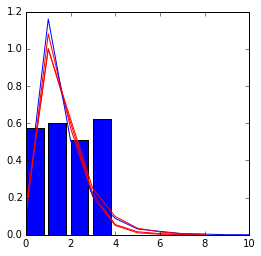

In [152]:
b1 = np.bincount(num_peak_arr_CH0).astype(np.float64)
b2 = np.bincount(num_peak_arr_CH1).astype(np.float64)

plot(a1/np.max(a2),color='r')
plot(a2/np.max(a2),color='r')
plot(b1/np.max(b2),color='b')
plot(b2/np.max(b2),color='r')

d1 = a1/np.max(a2)
d2 = a2/np.max(a2)
d3 = b1/np.max(b2)
d4 = b2/np.max(b2)

bar([0,1,2,3],[d1[2],d2[2],d3[2],d4[2]])


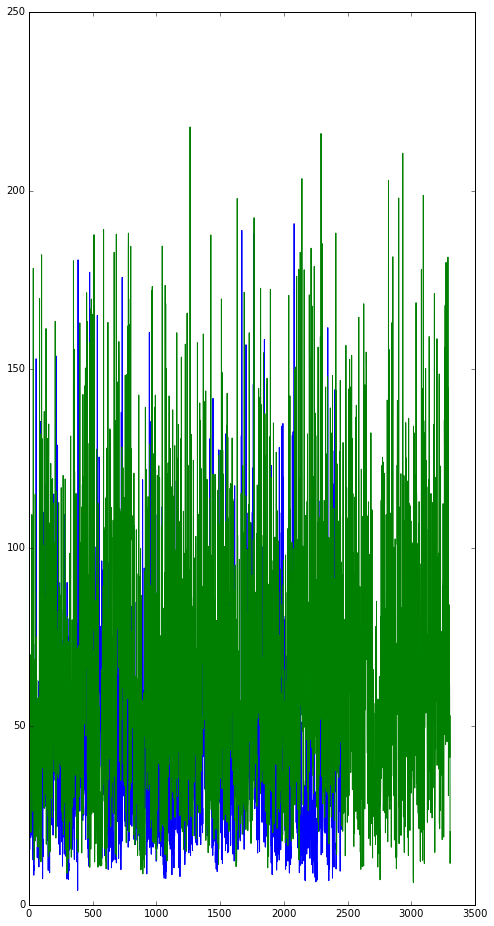

In [127]:
plot(grn_ratio_0)
plot(grn_ratio_1)

In [117]:
print average(grn_ratio_0)
print average(grn_ratio_1)
print 'out',np.average(grn_ratio_1)/np.average(grn_ratio_0)
print average(red_ratio_0)
print average(red_ratio_1)
print 'out',np.average(red_ratio_1)/np.average(red_ratio_0)

70.3946330631
86.1322405114
out 1.22356260362
53.7019978079
67.1594273065
out 1.25059457837


In [119]:
print average(grn_ratio_0)
print average(grn_ratio_1)
print 'out',np.average(grn_ratio_1)/np.average(grn_ratio_0)
print average(red_ratio_0)
print average(red_ratio_1)
print 'out',np.average(red_ratio_1)/np.average(red_ratio_0)

43.3115187679
63.8109162677
out 1.47330128527
61.7532115826
75.8005835627
out 1.22747597445


<Container object of 4 artists>

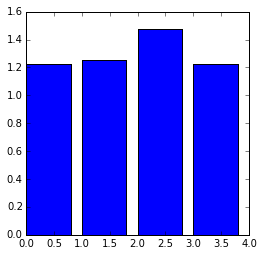

In [124]:
#In the situation where is only one peak. The Pex11 peak is very bright.
#When you have more than one peak you 
bar([0,1,2,3],[1.2235,1.2506,1.4733,1.2275])

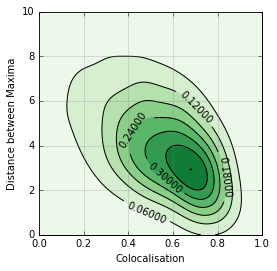

In [25]:
import numpy as np
import matplotlib.pyplot as pl
import scipy.stats as st
x_arr = []
y_arr = []
for bout,cout in zip(data_out2,data_out1):
    bout = np.array(bout)
    cout = np.array(cout)
    bbout = bout[(1-np.isnan(cout)).astype(np.bool)]
    ccout = cout[(1-np.isnan(cout)).astype(np.bool)]
    y_arr.extend(list(ccout))
    x_arr.extend(list(bbout))

ax = plot_area(x_arr,y_arr,'Greens')
out_path = '/Users/dwaithe/Documents/collaborators/GalianiS/pex/figures/'
ax.savefig(out_path+'max_versus_coloc_pex5pex14.eps', dpi=150 )

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):
/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/text.py:52: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if rotation in ('horizontal', None):
/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/text.py:54: UnicodeWarning: Unicode equal comparison f

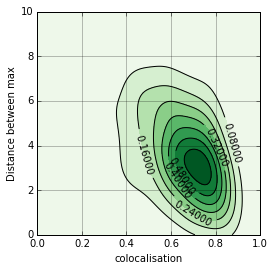

In [15]:
import numpy as np
import matplotlib.pyplot as pl
import scipy.stats as st
x_arr = []
y_arr = []
for bout,cout in zip(data_out2,data_out1):
    bout = np.array(bout)
    cout = np.array(cout)
    bbout = bout[(1-np.isnan(cout)).astype(np.bool)]
    ccout = cout[(1-np.isnan(cout)).astype(np.bool)]
    y_arr.extend(list(ccout))
    x_arr.extend(list(bbout))
plot_area(x_arr,y_arr,'Greens') 

In [22]:
def plot_area(x,y,colour):
    xmin, xmax = 0.0, 1.0
    ymin, ymax = 0, 10

    # Peform the kernel density estimate
    xx, yy = np.mgrid[xmin:xmax:200j, ymin:ymax:200j]
    positions = np.vstack([xx.ravel(), yy.ravel()])
    values = np.vstack([x, y])
    kernel = st.gaussian_kde(values)
    f = np.reshape(kernel(positions).T, xx.shape)

    fig = pl.figure()
    ax = fig.gca()
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    # Contourf plot
    cfset = ax.contourf(xx, yy, f, cmap=colour)
    ## Or kernel density estimate plot instead of the contourf plot
    #ax.imshow(np.rot90(f), cmap='Blues', extent=[xmin, xmax, ymin, ymax])
    # Contour plot
    cset = ax.contour(xx, yy, f, colors='k')
    # Label plot
    ax.clabel(cset, inline=40, fontsize=10,fmt='%1.5f')
    ax.set_xlabel('Colocalisation')
    ax.set_ylabel('Distance between Maxima')
    grid(b=True, which='major', color='grey', linestyle='-',alpha=0.5)
    pl.show()
    return fig



In [187]:
x1 = []
y1 = []
x = []
y = []

for r in range(1,100):
    bin_im = gen_cir_mask(r*4.0)
    per_im = bin_im[1:-1,1:-1]- gen_cir_mask((r-1)*4.0)
    x1.append(np.sum(bin_im))
    y1.append(np.sum(per_im))
    x.append(pi*(r**2))
    y.append(2.0*pi*r)

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:8: DeprecationWarning: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.


ValueError: operands could not be broadcast together with shapes (2,2) (0,0) 

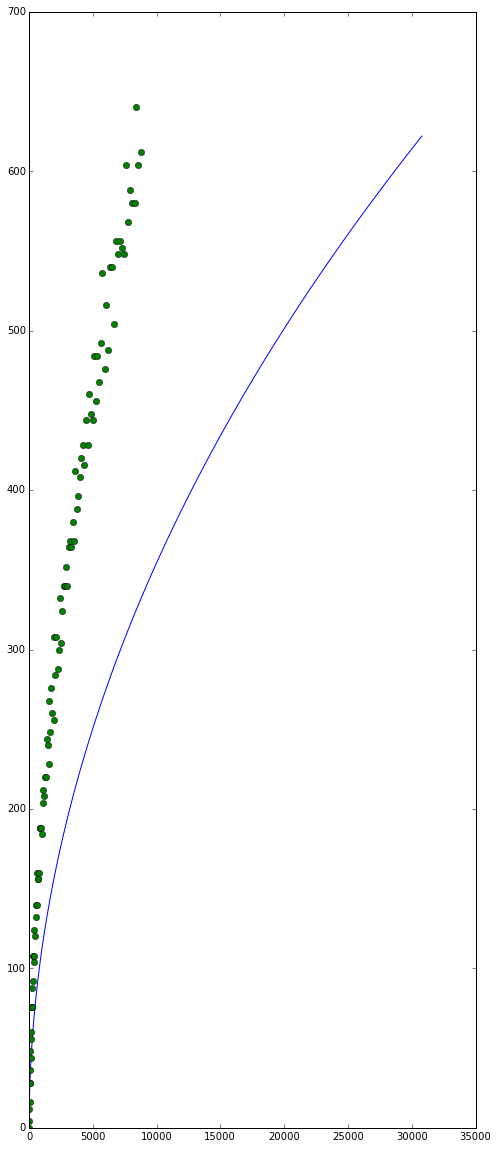

In [185]:
plot(x,y)
plot(x1,y1,'o')

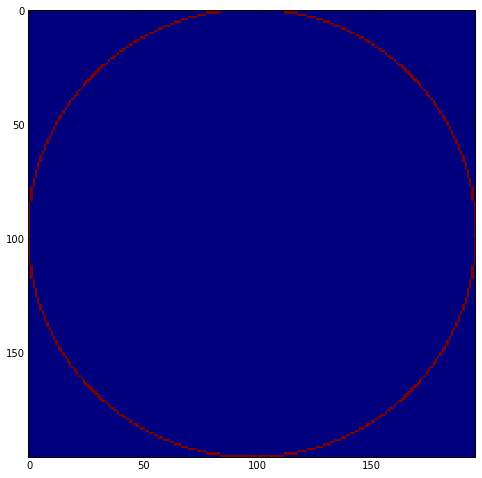

In [186]:
imshow(per_im,interpolation='nearest')

In [11]:
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
filename = '/Users/dwaithe/Desktop/coord.txt' 
in_x = [];
both = [];
in_y = [];
img = np.zeros((1500,1500))
class_im = np.zeros(img.shape)
with open(filename) as inputfile:
    inputfile.readline()
    for line in inputfile:
        strp = line.strip().split('\t')
        in_x.append(int(strp[0]))
        in_y.append(int(strp[1].split('\n')[0]))
        both.append([in_y[-1],in_x[-1]])
        img[in_y[-1],in_x[-1]] = 255


        #estimator = KMeans(init='k-means++', n_clusters=300, n_init=1)
#estimator.fit(both)
#centroids = estimator.cluster_centers_

estimator = MeanShift(bandwidth=20, bin_seeding=False);
estimator.fit(both)
centroids = estimator.cluster_centers_

In [12]:
out = estimator.predict(both)

class_im[in_y,in_x] = np.array(out)


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


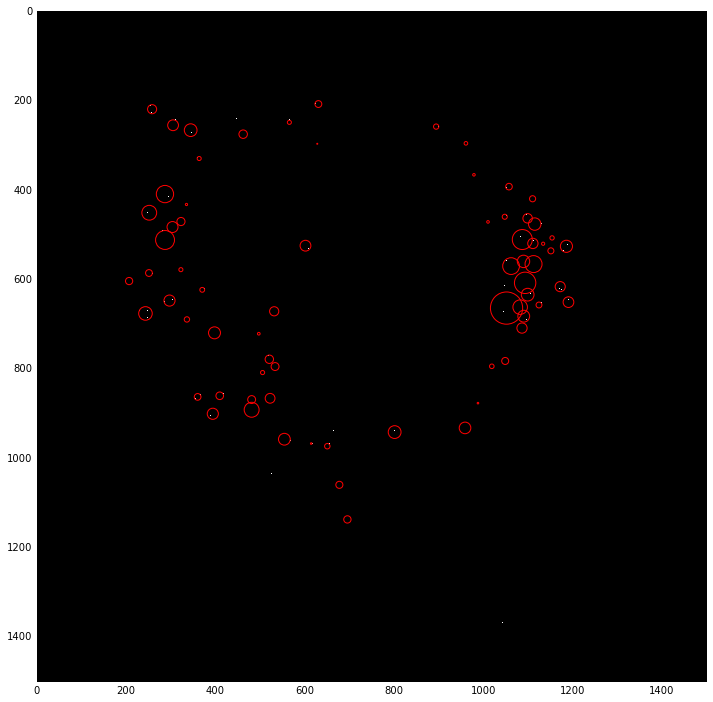

In [13]:
%pylab inline
figsize(12,12)
figure()
#imshow(class_im,interpolation='nearest')
#plot(centroids[:,1],centroids[:,0],'o')
figure();
cen_x = 0
cen_y =0
npinx = np.array(in_x)
npiny = np.array(in_y)
fig = plt.gcf()
ax = plt.gca()
radius_arr = []
ratio_arr = []
f = open('/Users/dwaithe/Desktop/coord_back.txt', 'w')

for a in range(centroids.shape[0]):
    if centroids[a,0] >0 and centroids[a,1] >0:
        x_point = centroids[a,0]#-800
        y_point = centroids[a,1]#-800
        #plot(y_point,x_point,'o')
        
        coord_x = npinx[out == a]
        coord_y = npiny[out == a]
        if cen_x != centroids[a,1] and cen_y != centroids[a,0]:
            cen_x = centroids[a,1]
            cen_y = centroids[a,0]

            radius = np.max(np.sqrt((coord_x-cen_x)**2 +(coord_y-cen_y)**2))
            radius_arr.append(radius)
            ratio_arr.append((radius/ coord_x.shape[0]))
            #if ((radius/ coord_x.shape[0]) < 2):
            fig.gca().add_artist(plt.Circle((cen_x,cen_y),radius,color='r',fill=False))
            f.write(str(cen_x)+'\t'+str(cen_y)+'\t'+str(radius)+'\n')
        
f.close()
        
        
imshow(img[:,:],interpolation='nearest',cmap='gray')        

    

9.3914855055


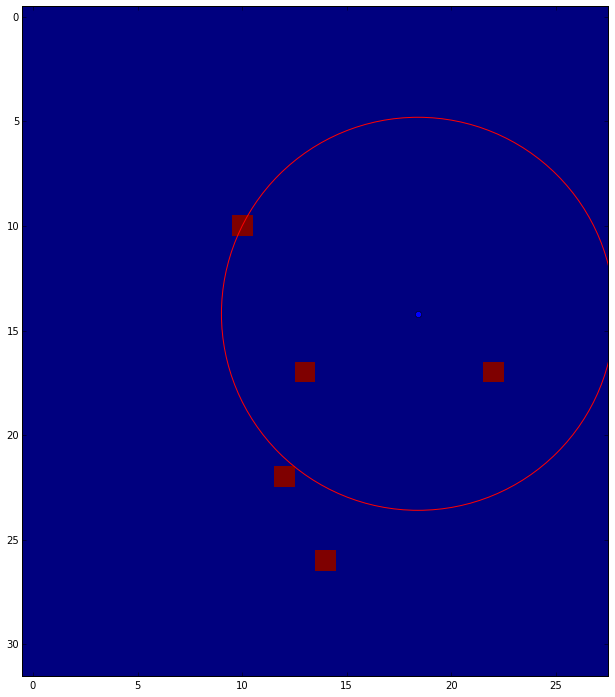

In [386]:
class_im[in_y,in_x] = np.array(out)
npinx = np.array(in_x)
npiny = np.array(in_y)
uq = np.unique(out)
clu = 8
for i in range(clu,clu+1):
    coord_x = npinx[out == i]
    coord_y = npiny[out == i]
    cen_x = centroids[i,1]
    cen_y = centroids[i,0]
    maxx =np.max(coord_x)+5
    maxy =np.max(coord_y)+5
    minx =np.min(coord_x)-5
    miny =np.min(coord_y)-5
    
    radius = max(np.sqrt((coord_x-cen_x)**2 +(coord_y-cen_y)**2))
    print radius
    
    
    imgZ = np.zeros((maxy-miny+6,maxx-minx+6))
    imgZ[coord_y-miny+5,coord_x-minx+5] = 255
import matplotlib.pyplot as plt

circle2=plt.Circle((cen_y-miny+5,cen_x-minx+5),radius,color='r',fill=False)
fig = plt.gcf()
ax = plt.gca()
ax.plot(cen_y-miny+5,cen_x-minx+5,'o')
ax.imshow(imgZ,interpolation='nearest')

fig.gca().add_artist(circle2)


In [230]:
coord_x-cen_x
coord_y-cen_y

array([-3.,  0., -6., -1., -2., -8.,  6.,  5., -4.,  8., -7.,  6.])

In [263]:
np.sqrt((coord_x-cen_x)**2 +(coord_y-cen_y)**2)

array([ 10.29304355,   9.84615385,   9.87735441,   6.9188021 ,
         5.2426336 ,   8.21025481,   6.05937095,   5.13140926,
         5.7666661 ,   9.01412435,   8.69264805,  10.94499426])

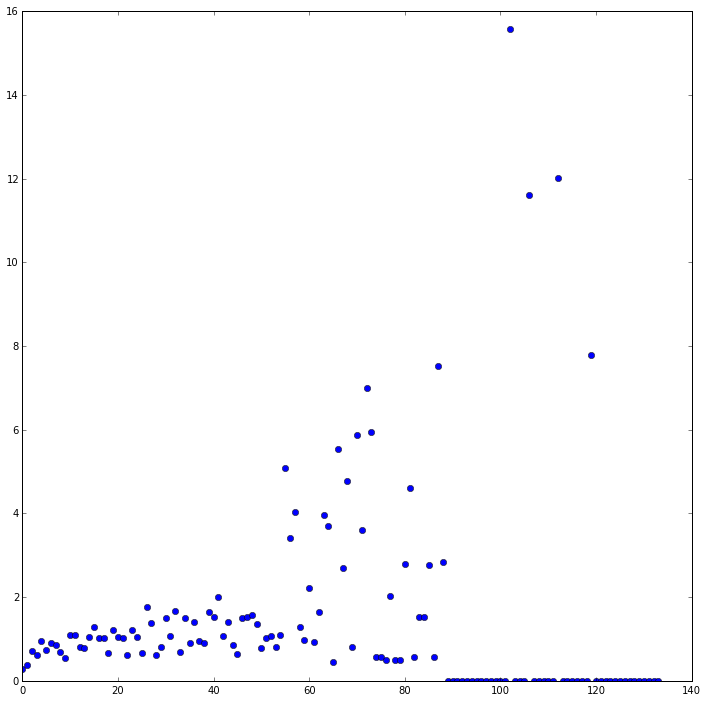

In [318]:
plot(ratio_arr,'o')

In [309]:
radius/ coord_x.shape[0]

0.0

In [310]:
radius

0.0